# 텍스트 데이터분석 중간고사 프로젝트

### 프로젝트 서론

2019년부터 연일 집값 상승과 코로나 19의 여파로 일명 개미라 불리는 일반인들의 주식 계좌 신설과 거래량이 폭발적으로 증가하였다. 이는 젊은 층의 사람들이 내 집 마련과 재산증식과 같은 목표를 이루는데 가장 빠른 방법이 주식이라는 생각에서 거래량이 폭발적으로 증가하였다. 폭발적으로 증가한 거래량만큼 주식으로 인해 손해를 보는 사람들이 많이 생겨나기 시작했다. 이는 전문적인 지식 없는 투자와 투기성 투자로 인해 생기는 문제점이다. 이러한 이유로 주식 거래에 있어서 정보는 필수적이다.

주제: 기업에 관련된 뉴스 제목을 분석하여 주식의 상승과 하락을 예측하고, 투자의 타이밍을 알아보자

* 세부주제
- 텍스트 데이터 분석을 통해 상승과 하락의 많이 나오는 단어를 파악
- 감성분석을 사용하여 상승과 하락을 예측
- 주제분석을 통하여 상승과 하락의 관련 주제를 파악 타이밍을 파악

## 목차 index  

1. Library
2. Web Crawling
3. Data Processing
4. TDM & Word Cloud
5. Sentiment Analysis
6. Topic Analysis
7. Conclusion
8. Self_Fedback

## 1. Library

In [1]:
# Crawling
from selenium import webdriver
import time
import openpyxl

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import stanza
from kiwipiepy import Kiwi
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import spacy
import re

In [3]:
import numpy as np
import joblib

In [4]:
# 한글 폰트 설정
import platform
from matplotlib import font_manager, rc
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

In [5]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.decomposition import TruncatedSVD # 행렬분해
from gensim.matutils import Sparse2Corpus
import re
from gensim.models.ldamodel import LdaModel
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pyLDAvis.gensim
from gensim.models import CoherenceModel
from factor_analyzer.rotator import Rotator

C:\Users\pc\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [7]:
from matplotlib import pyplot
from sklearn.decomposition import NMF
from gensim.corpora.dictionary import Dictionary

C:\Users\pc\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 2.Web Crawling

Web Crawling은 2차레에 거쳐 진행 4월 12일에 프로젝트 시작으로 Data Crawling을 하고 2차로 프로젝트 마감 이틀전인 4월 29일에 시행

홈페이지는 다음 증권에서 삼성전자를 검색 홈페이지 뉴스 공시 메뉴 들어가 Crawling

### Driver

In [8]:
dr = webdriver.Chrome('./chromedriver')

C:\Users\pc\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SessionNotCreatedException: Message: session not created: This version of ChromeDriver only supports Chrome version 89
Current browser version is 91.0.4472.124 with binary path C:\Program Files\Google\Chrome\Application\chrome.exe


### Url

In [4]:
dr.get('https://finance.daum.net/')

### 검색어 입력

In [5]:
www = input('종목명, 종목코드를 입력해주세요.')

종목명, 종목코드를 입력해주세요.삼성전자


In [6]:
dr.find_element_by_css_selector('input#inpSearchStock.tf_keyword').send_keys(www)

In [7]:
dr.find_element_by_css_selector('button#btnSearchStock.btn_search').click()

In [8]:
dr.find_element_by_css_selector('a.txt').click()

### 뉴스 공시 들어가기

In [9]:
main = dr.find_elements_by_css_selector('tr#boxTabs td a')
main[4].click()

### 내용 긁어오기

### 제목버전_0412

In [ ]:
start_time = time.time()

wb = openpyxl.Workbook()
sheet = wb.active
sheet.append(['제목','신문사','년도','월','일'])

for k in range(50):
    news = dr.find_elements_by_css_selector("ul.listW li")
    for i in range(10):
        news = dr.find_elements_by_css_selector("ul.listW li")
        for j in range(20):
            news = dr.find_elements_by_css_selector("ul.listW li")
            try:
                title = news[j].find_element_by_css_selector("a.tit").text
            except:
                title = 'x'
            try:
                nc = news[j].find_element_by_css_selector("p.date").text.split('·')[0]
            except:
                nc = 'x'
            try:
                year = news[j].find_element_by_css_selector("p.date").text.split('·')[1].split('.')[0]
            except:
                year='x'
            try:
                month = news[j].find_element_by_css_selector("p.date").text.split('·')[1].split('.')[1]
            except:
                month = 'x'
            try:
                day = news[j].find_element_by_css_selector("p.date").text.split('·')[1].split('.')[2]
            except:
                day='x'
            
            print(title,' ',nc,' ',year,' ',month,' ',day)
            sheet.append([title,nc,year,month,day])
            
            
            if j==19:
                page_bar = dr.find_elements_by_css_selector("div.paging > *")
                if k==0:
                    page_bar[i+1].click()
                    time.sleep(1.5)
                elif k== 49 and i==9:
                    break
                else:
                    page_bar[i+3].click()
                    time.sleep(1.5)
                    
wb.save('삼성전자_0412.xlsx')
print('크롤링 시간: {0:.1f} 초'.format(time.time()- start_time))

### 제목버전_0428

In [10]:
start_time = time.time()

wb = openpyxl.Workbook()
sheet = wb.active
sheet.append(['제목','신문사','년도','월','일'])

for k in range(50):
    news = dr.find_elements_by_css_selector("ul.listW li")
    for i in range(10):
        news = dr.find_elements_by_css_selector("ul.listW li")
        for j in range(20):
            news = dr.find_elements_by_css_selector("ul.listW li")
            try:
                title = news[j].find_element_by_css_selector("a.tit").text
            except:
                title = 'x'
            try:
                nc = news[j].find_element_by_css_selector("p.date").text.split('·')[0]
            except:
                nc = 'x'
            try:
                year = news[j].find_element_by_css_selector("p.date").text.split('·')[1].split('.')[0]
            except:
                year='x'
            try:
                month = news[j].find_element_by_css_selector("p.date").text.split('·')[1].split('.')[1]
            except:
                month = 'x'
            try:
                day = news[j].find_element_by_css_selector("p.date").text.split('·')[1].split('.')[2]
            except:
                day='x'
            
            print(title,' ',nc,' ',year,' ',month,' ',day)
            sheet.append([title,nc,year,month,day])
            
            
            if j==19:
                page_bar = dr.find_elements_by_css_selector("div.paging > *")
                if k==0:
                    page_bar[i+1].click()
                    time.sleep(1.5)
                elif k== 49 and i==9:
                    break
                else:
                    page_bar[i+3].click()
                    time.sleep(1.5)
                    
wb.save('삼성전자_0428.xlsx')
print('크롤링 시간: {0:.1f} 초'.format(time.time()- start_time))

'베일 가려진 지분율' 삼성생명 상속분 일부 시장에 나오나   이데일리     2021   04   28
[마켓뷰] 美 빅테크 기업 실적 시즌 불안감에 코스피·코스닥 1% 넘게 하락   조선비즈     2021   04   28
"인류건강 증진은 기업의 사명" 故 이건희 유족, 의료분야에 1兆원 기부   이데일리     2021   04   28
'이건희 상속세' 12조..'의료사업' 1조 기부·미술품 2만3천점도 기증   스포츠경향     2021   04   28
[생생경제] 삼성 상속세 계획, 남매들의 상속비율을 밝히지 않은 이유는?   YTN     2021   04   28
삼성 일가, 배당금·대출 등으로 상속세 낼 듯(종합)   연합뉴스     2021   04   28
이건희의 약속, 13년 만에 지켰다.. 의료사업에 1조 기부   국민일보     2021   04   28
코스닥 다시 1,000선 하회..코스피도 3,200선 아래로(종합)   연합뉴스     2021   04   28
"삼성이 피카소·모네 방출"..외신도 놀란 '이건희 컬렉션' 기증   데일리안     2021   04   28
코스닥, 1,000선 '이탈'..공매도 경계감 등 관망세 확산   한국경제TV     2021   04   28
삼성 계열사 주가 동반 하락.."배분 내용 공개되도 삼성전자에 미칠 영향 미미"   파이낸셜뉴스     2021   04   28
장 중 기업공시[4월 28일]   서울경제     2021   04   28
코스피, 美 FOMC 우려에 1.06% 하락..3180대로 밀려   아이뉴스24     2021   04   28
삼성 일가 '유산 1조' 사회환원..'이재용 사면여론 확대' 경계해야   쿠키뉴스     2021   04   28
전 재산의 60% 사회 환원하고 떠난 이건희..역대급 상속세 12조   국민일보     2021   04   28
[뉴스큐] 삼성家, 상속세만 12조 원..지분 분배는 어떻게?   YTN     2021   04 

'이건희 컬렉션' 기증..김환기 '여인들과 항아리'   연합뉴스     2021   04   28
마지막까지 빛난 故 이건희 회장의 '인간과 생명 존중'   디지털타임스     2021   04   28
'삼성 일가' 상속세 '12조 원'..'이건희 컬렉션' 기증   SBS     2021   04   28
국가 박물관 등에 기증되는 '이건희 컬렉션'   연합뉴스     2021   04   28
국가 박물관 등에 기증되는 '이건희 컬렉션'   연합뉴스     2021   04   28
국가 박물관 등에 기증되는 '이건희 컬렉션'   연합뉴스     2021   04   28
국가 박물관 등에 기증되는 '이건희 컬렉션'   연합뉴스     2021   04   28
국가 박물관 등에 기증되는 '이건희 컬렉션'   연합뉴스     2021   04   28
삼성 일가 의료공헌 1조 기부..배경은?   헤럴드경제     2021   04   28
李회장의 '노블레스 오블리주'..삼성家 계속 이어간다   헤럴드경제     2021   04   28
'이건희의 어린이 사랑'..유족들의 소아 희귀질환 지원 결실로   이데일리     2021   04   28
코스피·코스닥 동반 하락..美증시, FOMC 주시하며 혼조세   SBS Biz     2021   04   28
삼성가 상속세 '12조 원 이상'..주식 배분은 공개 안해   JTBC     2021   04   28
'이건희 상속세' 역대급 12조, '이병철 상속세'의 680배   연합뉴스     2021   04   28
"의료공헌은 기업 사명"..이건희 뜻 살려 감염병·소아질환 1조 기부   이데일리     2021   04   28
'삼성전자는 이재용에게, 삼성생명은 가족분할' 거론   문화일보     2021   04   28
삼성家, 미술품 등 이건희 유산 60% 사회환원   문화일보     2021   04   28
[실전재테크]퇴직연금 맡겨만 두셨나요?..맞춤형 투자로 은퇴 든든하게   아시아경제  

"실적 개선 빠른 업종 주목.. 공매도 재개후 가치주 강세는 더 뚜렷"   머니투데이     2021   04   28
삼성, 오늘 밤11시 갤럭시북 프로 공개..사상 첫 '노트북 언팩'   뉴시스     2021   04   28
[빅데이터MSI]28일 오전 주식시장 심리 4단계 '보통'   뉴시스     2021   04   28
삼성전자, 이건희 상속세 오늘 발표한다   뉴시스     2021   04   28
"이재용, 그 어느 때보다 필요" 사면 건의에도 靑 "검토 안 해"   세계일보     2021   04   28
'30조 규모 추정' 이건희 유산 상속 내용 공개된다   SBS     2021   04   28
이건희 회장 유산 상속 내용 오늘 발표될 듯   지디넷코리아     2021   04   28
청 "이재용 사면 검토한 바 없다"..삼성일가 상속 내용 오늘 공개   MBN     2021   04   28
고 이건희 30조 유산 상속 오늘 발표.. 역대급 상속세 어떻게 낼까   파이낸셜뉴스     2021   04   28
'이건희 상속' 오늘 공개된다..핵심 포인트는?   쿠키뉴스     2021   04   28
이건희 30조 유산 상속 오늘 발표..역대급 세금 낸다   한국경제TV     2021   04   28
삼성, '똑똑한' AI 청소기 출시..상반기 17개 맞춤형 가전 출시   SBS Biz     2021   04   28
'이건희 상속안' 오늘 공개..역대급 사회 환원 나올 듯   SBS Biz     2021   04   28
이건희 상속방안 오늘 발표..세금·기부 내역 공개   연합뉴스TV     2021   04   28
빗발치는 '이재용 사면' 건의.. 정부 "검토계획 없다"   머니S     2021   04   28
경제 5단체, 이재용 사면 공식 건의.. 청와대 "검토한 바 없고 계획도 없다"   세계일보     2021   04   28
삼성, 오늘 '이건희 상속세' 발표 전망.. 사회환원 규모 얼마?  

[fn마감시황] 코스피, 外人‧기관 매도에 하락   파이낸셜뉴스     2021   04   27
부품 대란에 인재유출까지.. 불안한 K-제조업   디지털타임스     2021   04   27
코스피, 외국인·기관 팔자에 하락 마감..3210선 지켜   한국경제     2021   04   27
"삼성전자 M&A 1순위 거론"..실적도 '깜짝'   한국경제TV     2021   04   27
[코스피 마감]외인·기관 동반 매도에 약보합..3200선은 유지   이데일리     2021   04   27
광주전남 8개 경제단체, 이재용 부회장 특별사면 호소   연합뉴스     2021   04   27
[현장] "6m 반경도 인식"..진화하는 삼성 로봇청소기, AI로 '승부수'   아이뉴스24     2021   04   27
각계서 쏟아지는 이재용 사면 요구.. 국민 70% 사면 찬성   이데일리     2021   04   27
차량 반도체 회사 NXP 1분기 '깜짝 실적'..삼성전자가 인수할까   연합뉴스     2021   04   27
"이재용 사면해야" 69.4%, 전직 대통령은 42.8% [윈지코리아]   조선비즈     2021   04   27
'굴뚝경제'가 살아난다..코로나19 이전보다 뜨겁게   한겨레     2021   04   27
삼성카드, 삼성전자와 반려동물 전문 서비스 선봬   한국경제     2021   04   27
삼성카드, 삼성전자와 반려동물 전문 서비스 협업..'ESG 경영 일환'   디지털타임스     2021   04   27
"반려동물 배설물은 피해간다"..삼성 로봇청소기 '비스포크 제트봇' 출시   중앙일보     2021   04   27
韓, 내년 상하이 국제기능올림픽 51명 참가..워크숍 개최   아시아경제     2021   04   27
광주·전남 경제단체, 이재용 삼성 부회장 특별 사면 촉구   더팩트     2021   04   27
삼성전자, 고성능 기업 서버용 SSD 출시..6세대 V낸드 적용   데

5개 경제단체장, 이재용 부회장 사면 촉구 건의서 제출   한국일보     2021   04   27
경제 5단체, 청와대에 '이재용 사면 건의서' 제출   조선비즈     2021   04   27
"세계 1위 지위 잃을 수도"..재계 이재용 사면 건의서 靑제출   머니투데이     2021   04   27
11번가 "'가성비폰' 갤럭시M12, 라방서 10% 할인"   한국경제     2021   04   27
[자금조달]해성옵틱스, 스마트폰 카메라부품 업계 생존 경쟁   아시아경제     2021   04   27
경제5단체, 이재용 사면건의서 제출.."세계 1위 잃을수도"   한겨레     2021   04   27
삼성전자, UN 선정 韓 유일의 '세계 100대 다국적 기업'   파이낸셜뉴스     2021   04   27
11번가, '삼성 갤럭시 M12' 자급제폰 최저가 판매   지디넷코리아     2021   04   27
11번가, 삼성 '갤럭시 M12' 라방서 최저가 판매   아시아경제     2021   04   27
11번가, 라방서 '갤럭시 M12' 자급제폰 최저가 판다   뉴스1     2021   04   27
메쉬코리아, 투자유치 추진 위해 김승민 CFO 선임   아시아경제     2021   04   27
경제 5단체, 청와대에 이재용 사면건의서 제출   헤럴드경제     2021   04   27
경제5단체장, 이재용 부회장 사면 건의.."총수 역할 필요한 때"   이데일리     2021   04   27
5개 경제단체장, 이재용 부회장 사면 촉구.."화합과 포용 결단 내려달라"   뉴스1     2021   04   27
경총 등 '이재용 사면 건의서' 청와대 제출   서울신문     2021   04   27
손경식·최태원·구자열 등 경제 5단체장, 靑에 이재용 사면 건의서 제출   디지털타임스     2021   04   27
대한상의·경총 등 경제5단체, 청와대에 이재용 사면건의서 제출   연합뉴스     2021   

[머니S포토] 경총 제1차 ESG 경영위, 대화 나누는 '손경식'   머니S     2021   04   26
코스피, 종가 최고치 '턱밑' 터치.. 3210선 안착   쿠키뉴스     2021   04   26
제1차 ESG 경영위원회 참석한 기업대표들   연합뉴스     2021   04   26
제1차 ESG 경영위원회 참석한 기업대표들   연합뉴스     2021   04   26
[집중진단] 美 실적 시즌 훈풍 부나..코스피, 또 최고치 경신?   SBS Biz     2021   04   26
ESG 경영위원회 참석한 이인용 삼성전자 사장   연합뉴스     2021   04   26
코스피, 외국인 '사자'에 상승..3,217.53 마감   한국경제TV     2021   04   26
[마감시황]코스피 1% 올라 4거래일 만에 3,200선 회복   서울경제     2021   04   26
[코스피 마감]외인 순매수에 1% 가까이 상승..'3210선'   이데일리     2021   04   26
코스피 외인 매수에 0.99% 상승..3,200선 탈환(종합)   연합뉴스     2021   04   26
[머니S포토] 경총, 4대그룹 등 18개사 참여 속 'ESG 경영위' 출범   머니S     2021   04   26
게이밍 모니터시장 공략 속도내는 삼성·LG   이데일리     2021   04   26
경총, 제1차 ESG경영위원회 개최   전자신문     2021   04   26
삼성전자, 2021년형 QLED TV 출시 두 달 만에 1만대 돌파   스포츠조선     2021   04   26
참석 기업 대표들에게 인사하는 이인용 사장   뉴스1     2021   04   26
'미얀마 군부 연루 의혹' 포스코가 ESG 최상위? 한국도 '그린워싱' 우려   프레시안     2021   04   26
제1차 환경·사회·지배구조(ESG) 경영위원회   뉴시스     2021   04   26
경총, 제1차 환경·사회·지배구조(ESG) 경

코스피 0.3% 상승 3190선..개인 홀로 '사자'   뉴스1     2021   04   26
삼성전자, 업그레이드된 '폴더블폰' 온다..관련주 '주목'   SBS Biz     2021   04   26
코스피, 개인 매수세에 상승..3190선 회복   머니투데이     2021   04   26
11번가도 '최저가' 경쟁 합류 .. 최대 61%, 65만원 할인   머니투데이     2021   04   26
[특징주]이건희 회장 보유 주식 상속 어떻게?..삼성생명·삼성물산 강세   서울경제     2021   04   26
11번가, 상반기 최대 쇼핑축제 '전국민 쇼핑 페스티벌' 진행   파이낸셜뉴스     2021   04   26
[빅데이터MSI]26일 오전 주식시장 심리 2단계 '나쁨'   뉴시스     2021   04   26
돌아온 외국인들, 삼성전자 보다 SKT 더 사는 이유 [이슈+]   한국경제     2021   04   26
코스피, 장 초반 개인 매수세에 상승   조선비즈     2021   04   26
삼성물산, 미국에 700MW급 태양광 발전소 건설 추진   조선비즈     2021   04   26
KT-삼성전자, 세계 최초 국가재난안전통신 전국망 개통   뉴시스     2021   04   26
KT-삼성전자, 세계 최초 국가재난안전통신 전국망 개통   뉴시스     2021   04   26
세계 최초 국가재난안전통신 전국망 개통   뉴시스     2021   04   26
KT-삼성전자, 세계 최초 국가재난안전통신 전국망 개통   뉴시스     2021   04   26
KT-삼성전자, 세계 최초 국가재난안전통신 전국망 개통   뉴시스     2021   04   26
역세권 편리함 누린다..경기도 오산 '세마역 아피체 더 봄' 주목   서울신문     2021   04   26
[빅데이터MSI]시장심리 톱5, KB금융·LG생활건강·두산인프라코어·삼성전자·NH투자증권   뉴시스     2021   04   26
[글로벌

삼성전자, 창문형 에어컨 '윈도우 핏' 출시.. 성능·소음 다 잡았다   머니S     2021   04   25
코스피 주간 기관 순매도 1위 '삼성전자'   이데일리     2021   04   25
코스피 주간 외국인 순매도 1위 '삼성전자'   이데일리     2021   04   25
코스피 주간 개인 순매수 1위 '삼성전자'   이데일리     2021   04   25
삼성, 이건희 상속내역 이번 주 공개..수조원대 사회환원 계획 담길 듯   조선비즈     2021   04   25
D램값 25% 상승?..삼성전자 SK하이닉스 슈퍼 사이클 실적 기대감 '쑥'   매일경제     2021   04   25
이건희 유산 상속 방안 금주 공개.. 사회환원·지배구조 주목   헤럴드경제     2021   04   25
베일 벗는 이건희 유산 상속..수조 원대 사회환원 계획 나온다   SBS     2021   04   25
화웨이·샤오미 협공에 삼성전자 장고 깊어진다   시사저널     2021   04   25
베일벗는 이건희 유산 상속..수조원대 사회환원 계획 나온다   연합뉴스     2021   04   25
이건희 회장 상속세 기준 '시가'..에버랜드 부지 0.9조?·3.2조?   헤럴드경제     2021   04   25
박정호 "파운드리 투자 확대하겠다"..SK도 반도체전쟁 참전?   중앙일보     2021   04   25
[게시판] 이마트24, 삼성 정품 모바일 액세서리 6종 판매   연합뉴스     2021   04   25
전국 이마트24에서 삼성 갤럭시 이어폰·충전기 판다   머니S     2021   04   25
갤럭시 이어폰 편의점서 산다..이마트24, 삼성 모바일 액세서리 판매   아이뉴스24     2021   04   25
'이건희 상속세' 이번주 발표..예상 시나리오는?   한국경제TV     2021   04   25
삼성전자, 세계에서 가장 '신뢰받는 브랜드' 10위 선정   뉴스1     2021   04   

[오전시황]미 증세 소식에 코스피 하락세..원/달러 환율 상승 개장   헤럴드경제     2021   04   23
[오전시황]코스피, 美 바이든 행정부 증세에 장 초반 약세   서울경제     2021   04   23
[특징주]SK하이닉스 2.6% 하락 13만 붕괴..삼성전자도 약세   아시아경제     2021   04   23
SK하이닉스, 2%대 약세..두 달만에 장중 13만원 하회   머니투데이     2021   04   23
성장에 모멘텀 더한 반도체.."주가 재상승할 것" [株포트라이트]   헤럴드경제     2021   04   23
민주당 반도체 특위 출범.."세계대전서 이기겠다"   한국경제TV     2021   04   23
코스피, 美 세금 인상 소식에 '3150선' 약세..개인 나홀로 순매수   아시아경제     2021   04   23
코스피, 美 증시 약세에 0.8% 하락 3150선..코스닥 0.6%↓   뉴스1     2021   04   23
코스피, '美 세금 인상'에 장 초반 3,140대 밀려(종합)   연합뉴스     2021   04   23
[특징주] PHLX -2%..삼성전자·SK하이닉스도 '뚝'   서울경제     2021   04   23
정세균, '이재용 백신특사론'에 "삼바, SK가 정부와 이미 협력 중"   조선비즈     2021   04   23
코스피, 외인·기관 동반 매도에 하락 출발..3150선까지 밀려나   이데일리     2021   04   23
[마켓인사이트]코스닥 노리는 에드액스, 80억원 규모 투자 유치 성공   한국경제     2021   04   23
[fn오전시황] 코스피, 장 초반 1% 가까이 하락..3150선 붕괴   파이낸셜뉴스     2021   04   23
[투자노트] 경기순환주 빛 볼 '리플레이션 트레이드'   조선비즈     2021   04   23
경제 5단체, 정부에 이재용 삼성전자 부회장 사면 정식 건의한다   뉴스1     2021   04   23
대만 

연말 배당 놓쳤다면 고배당주 ETF 투자해 배당 받으세요   한국경제     2021   04   22
[마감시황] 코스피 소폭 상승 마감..3170대   헤럴드경제     2021   04   22
리빙 공룡 '메종 동부산' 6월 오픈   파이낸셜뉴스     2021   04   22
대만 TSMC 창업자 "최대 경쟁자는 삼성..美·中은 역부족"   조선비즈     2021   04   22
롯데 동부산에 가구 전문점 6월 개점..이케아와 경쟁 예고   연합뉴스     2021   04   22
대만 TSMC의 창업자 "삼성이 강력한 경쟁 상대"   경향신문     2021   04   22
현대차, 1분기 '어닝 서프라이즈 '..2분기는 '반도체' 변수   중앙일보     2021   04   22
수술 후 첫 법정 출석 이재용 측 "재판 연기에 감사"   아이뉴스24     2021   04   22
TSMC "삼성은 강력한 라이벌" 경계..정작 삼성은 위기감   한국경제     2021   04   22
삼성, 1분기 스마트폰 시장 정상 탈환..애플 꺾었다   MBN     2021   04   22
"두달 뒤 아이폰 나올 줄이야".. 최신원 회장 법정 세운 아이폰 나비효과   조선비즈     2021   04   22
김상범 이수그룹 회장, 직‧간접 지분 100% 회사에 일감 '몰빵'   시사저널     2021   04   22
증권거래세 몰린 부산수영세무서 작년 세수1위..주식열풍 때문   조선비즈     2021   04   22
'지구의 날', 정부 '기후변화주간' 운영..기업들도 다양한 친환경 실천   쿠키뉴스     2021   04   22
외인, 반도체·2차전지 대형주 담아   뉴시스     2021   04   22
충수염 이재용, 수척한 얼굴로 法 출석..법관 질문에 큰소리로 대답   쿠키뉴스     2021   04   22
솔루스첨단소재, 1분기 매출 888억..'동박' 역대 최대치   한국경제     2021   04   22


"수백억 벌어 퇴사하고파"..2030 코인열풍 확산   뉴시스     2021   04   22
삼성전자, '지구의 날' 맞아 업-리사이클링 캠페인 개최   국민일보     2021   04   22
가정의 달 5월, 집콕시대 '3대 이모' 가전이 대세   쿠키뉴스     2021   04   22
中에 공장 팔고나니 LCD값 폭등.. 속쓰린 삼성   조선일보     2021   04   22
중고 갤럭시폰 IoT 재활용 등.. 삼성전자 '지구의 날' 캠페인   동아일보     2021   04   22
코로나가 앞당긴 D램 슈퍼사이클.. 2분기 최대 25% 상승 전망   동아일보     2021   04   22
재계 '지구의 날' 다양한 친환경 캠페인   세계일보     2021   04   22
삼성, 20조원 투입 美에 반도체 공장.. 이르면 하반기 착공   동아일보     2021   04   22
다음주 공개될 삼성 상속세..그룹 주가 희비 갈릴까   이데일리     2021   04   22
너와 나의 연결고리.. 삼성-애플, 다음 전쟁터는 '태그'   국민일보     2021   04   22
이재용 '백신 특사론'.."반도체 지렛대로 백신 확보해야"   중앙일보     2021   04   22
[강인선·배성규의 모닝라이브] 美 '반도체 동맹' 압박, 삼성엔 오히려 기회   조선일보     2021   04   22
삼성웰스토리, 단체급식 개방에 신사업 먹구름 '이중고'   더팩트     2021   04   22
[포토] "혁신 제품 한자리에" 삼성·LG·KT '월드IT쇼' 참가   국민일보     2021   04   21
동학개미운동·삼성전자 특별배당 영향.. 코스피 배당금 60%↑   한국일보     2021   04   21
애플, '괴물 칩셋'의 아이패드 공개.. 삼성과 태블릿PC 대전   세계일보     2021   04   21
팔 수도 없는 국보급 문화재..기증으로 절세?   MBC     2021   04   21
[하이닉스도

치솟는 코스피..3개월 만에 예탁금 70조 눈앞   머니투데이     2021   04   21
나무기술-씨플랫폼, 클라우드 플랫폼 '칵테일 클라우드' 공공총판 계약 체결   전자신문     2021   04   21
엔비디아-ARM 인수합병에 공정위 "집중 검토하겠다"   한겨레     2021   04   21
이재용 '무노조 경영 폐기' 결실..노사 관계 증진 속도   데일리안     2021   04   21
작년 대기업 부채 1,500조 넘어.. 올해 갚을 돈만 780조   한국일보     2021   04   21
삼성전자, 월드IT쇼 2021 참가 혁신 제품 소개   스포츠조선     2021   04   21
스위스 발명대회 휩쓴 한국 제품들..정작 국내 납품은 '찬바람'   뉴시스     2021   04   21
지난해 배당금 5년래 최대..코스피 시가배당률 2.28%   헤럴드경제     2021   04   21
[오후시황]코스피 최고 찍은 지 하루 만에 1.6% '뚝'..일본·홍콩 동반 급락   서울경제     2021   04   21
지난해 대기업 부채 1500조 돌파.. 올해 갚을 빚만 780조   머니S     2021   04   21
코스피 기업들 지난해 현금배당 33조로 60%↑..코스닥도 최대 규모   서울경제     2021   04   21
삼성·LG전자 '월드IT쇼 2021' 참가, 혁신제품 전시   파이낸셜뉴스     2021   04   21
삼성전자, '월드IT쇼 2021'서 혁신 제품 소개.."더 나은 일상 체험"   한국경제TV     2021   04   21
20대 10명 중 4명은 주식 투자..마이너스통장 빚 75%↑   SBS     2021   04   21
'주식 열풍'에 코스피 배당금 33조..수익률은 기존금리 웃돌아   한겨레     2021   04   21
"쿠팡 총수 지정은 靑 경제활성화 의지에 역행"   문화일보     2021   04   21
코스피, 2020년 배당총액 33조2000

협력 강화하는 삼성·LG..반도체·DP 주거니 받거니   데일리안     2021   04   21
올들어 대형주 쏠림현상 지속..개미들 '단타→장타로'   데일리안     2021   04   21
차세대 배터리 패권경쟁 뛰어든 BMW.."2030년 양산"   머니투데이     2021   04   21
삼성전자, 스마트공장 기반 '산업용 5G' 특허 세계 1위   뉴스1     2021   04   21
글로벌 D램 가격 상승세 본격화.."2분기 18∼23% 뛸 것"   연합뉴스     2021   04   21
'가상 낚시터' 세계 1위 강태공..알고보니 치매 노인   머니투데이     2021   04   21
제일모직-삼성물산 합병비율, 법적으로 문제 없다   머니투데이     2021   04   21
반도체 공룡들 역대급 투자.. 글로벌 '패권 다툼' 치열   서울신문     2021   04   21
美도 8개중 2개만 받았는데..끝내 ILO 핵심협약 강행한 정부   중앙일보     2021   04   21
배당금 대박난 친구 부럽네..배당株 들어갈 적절한 타이밍은?   머니투데이     2021   04   21
'이건희 상속세' 계획 내주 중 발표   국민일보     2021   04   21
판 뒤집었던 '평창 유치' 때처럼.. 기업인들 인맥 총동원해야   조선일보     2021   04   21
英, 美엔비디아의 ARM 인수 제동.. "안보 우려" 조사   동아일보     2021   04   21
삼성家, 이건희 유산규모-상속절차 내주 밝힐듯   동아일보     2021   04   21
조계종 25개 교구본사 주지들 "이재용 선처를"   동아일보     2021   04   21
"비용 더 들어도.. 지속가능한 미래 앞장설 것" [K브랜드 리포트]   세계일보     2021   04   21
차별화된 화질 '네오 QLED'.. TV시장 패러다임 다시 바꿨다 [K브랜드 리포트]   세계일보     2021   04   21
삼성, 

무역협회, '2021 월드 IT쇼' 연다..5G·디지털 뉴딜 기업 한 자리   데일리안     2021   04   20
'공시 의무화' 불 떨어진 대기업..내부거래 비중 '물류' 삼성·'SI' 롯데 가장 높아   아시아경제     2021   04   20
삼성 '이건희 상속세' 내주초 발표   헤럴드경제     2021   04   20
"총수 풀려나면 공격투자 이어졌다"..기업인 사면론 재점화   아시아경제     2021   04   20
코로나 시국에도 '배당금 100억 클럽' 가입한 총수 19명 누구   매일경제     2021   04   20
삼성 8K용 반도체 개발 성공.."초고화질TV 새 장 열 것"   헤럴드경제     2021   04   20
삼성디스플레이, 인도서 OLED 패널 생산 돌입   헤럴드경제     2021   04   20
"작년 50대 그룹 총수 배당금 1조8천억원..이건희 몫이 절반"   SBS Biz     2021   04   20
코스피, 3200선 회복..美증시, 고점 부담에 숨 고르기   SBS Biz     2021   04   20
"반도체기획관 둬야" "靑결단만 남아"..이재용 사면론 '솔솔'   한국경제     2021   04   20
삼성전자 초고화질 8K TV 숨은 공신 반도체 3종 세트 소개   연합뉴스     2021   04   20
10명중 8명 "VR 보고 집 계약 하겠다"..확 달라진 '가상세계'   머니투데이     2021   04   20
코스피, 외인 순매수에 장중 3200선 안착   조선비즈     2021   04   20
[증시신상품] 한국투자증권, 삼성전자·현대차 기반 ELS   연합뉴스     2021   04   20
'3200 고지' 삼성전자·중국·기관에 달렸다   헤럴드경제     2021   04   20
삼성전자 "초고화질 8K TV 성공 비결은 1등 반도체"   아시아경제     2021   04   20
5G·디지털 뉴딜 기업 한 자리에..'2021 월드 IT

삼성전자 '70조 역대급 투자' 기대..반도체 장비주 급등   한국경제     2021   04   19
삼성 폴더블폰에 광학필름 공급..세경하이테크 "올 매출 3000억"   한국경제     2021   04   19
반도체 대란 확산에 정부, 이재용 사면카드 '만지작'   파이낸셜뉴스     2021   04   19
[마켓뷰] 코스피 강보합 마감..외국인은 순매도 전환   조선비즈     2021   04   19
OLED TV 시장 확대에 방긋 웃는 LG   아이뉴스24     2021   04   19
삼성전자, 패권경쟁 속 50조 반도체 투자 보따리 푸나   아이뉴스24     2021   04   19
상장사 현금배당금 전년比 12조원 증가.."삼전 비중이 90%"   디지털타임스     2021   04   19
코스피, 동학개미 매수세에 6일째 상승..3200선 탈환엔 실패   아이뉴스24     2021   04   19
투자자예탁금 하루새 1.3조 증가..삼성전자 배당금 영향   연합뉴스     2021   04   19
반도체 품귀 '2년 더'..인텔·TSMC 맞서 삼성도 투자 박차 가하나   이데일리     2021   04   19
코스피, 3200선 '턱밑' 마감.. 우선주 상승 행렬   쿠키뉴스     2021   04   19
올해도 '집콕'..新가전 수요는 계속된다   한국경제     2021   04   19
삼성전자, 가전·스마트폰 '프리미엄 리더십'..공격 투자로 초격차 벌린다   한국경제     2021   04   19
한발짝 더 다가온 미래藥..전자약·디지털치료제   이데일리     2021   04   19
원·달러 환율, 소폭 올라 마감[인더머니]   헤럴드경제     2021   04   19
박범계 "이재용 가석방·사면, 검토 안해..아직 건의할 생각도 없다"   조선비즈     2021   04   19
코스피, 강보합 마감..개인 4천억원 순매수   한국경제TV     2021   04   19
[마감시황]

'정수 끝판왕' 삼성전자   한국경제     2021   04   18
반도체 품귀..CCTV도 꺼진다   한국경제     2021   04   18
10배 값 주고 칩 쓸어가는 中..삼성 사장들도 "재고 없다" 긴급출장   한국경제     2021   04   18
'이건희 상속세' 13조원 납부기한 임박..납부 어떻게?   경향신문     2021   04   18
삼성, 밀려드는 주문에 자체 설비 부족하자..반도체 외주 더 늘린다   한국경제     2021   04   18
삼성 일가, '상속세 13조 원' 쪼개 내고 주요 예술품은 기증 유력   YTN     2021   04   18
중소형주 뜬다..4월 수익률 '형님보다 아우'   매일경제     2021   04   18
[단독] 대기업 참여 ESG경영委 26일 발족.."4대그룹 참여"   파이낸셜뉴스     2021   04   18
삼성전자, 역대급 투자계획 내놓나..사면론도 '솔솔'   뉴시스     2021   04   18
백악관 회의 다녀온 삼성전자, 50조 역대급 투자 계획 내놓나   중앙일보     2021   04   18
[CEO] "반도체 클린룸에 쓰는 기술로 가정용 공기청정기 만들었죠"   매일경제     2021   04   18
이건희 상속세 이달말 납부기한 마감..'분납'에 무게   뉴시스     2021   04   18
총수 없는 삼성전자, 목이 조여온다.. 인텔·TSMC 미국편   국민일보     2021   04   18
[그래픽] 국민연금 삼성전자 주식 거래 현황   연합뉴스     2021   04   18
비스포크 시리즈가 KT 대리점에?..KTx삼성 콜라보 체험매장   중앙일보     2021   04   18
수술로 연기된 '이재용 첫 재판' 이번주 열려..법정 출석   지디넷코리아     2021   04   18
격랑의 반도체 패권다툼..삼성, 최소 50조 투자결정 칼뽑나   아시아경제     2021   04   18
국민연금, 19개월간 삼성전자 

원익머트리얼즈, 2021·2022년 사상 최대 실적 전망..목표가↑-신한금투   아이뉴스24     2021   04   16
삼성전자 외국인 배당 무려 '7조'..원·달러 환율 급등하나 [전망+]   한국경제     2021   04   16
[외환브리핑]삼성전자 외국인 배당금 실수요 물량에 상승 압력   이데일리     2021   04   16
美 다우 사상 첫 3만4000 돌파..코스피도 최고점 찍을까   머니투데이     2021   04   16
[빅데이터MSI]16일 오전 주식시장 심리 1단계 '매우나쁨'   뉴시스     2021   04   16
[뉴스새벽배송]다우·S&P '또 최고치'..삼성전자 13兆 배당금 지급   이데일리     2021   04   16
[조간브리핑] 카카오뱅크, 상장예비심사 신청..2조 원 실탄 마련할까   SBS Biz     2021   04   16
[뉴스업]"총수 연봉은 총수 멋대로? 기업 적자에도 2배 껑충"   노컷뉴스     2021   04   16
[오늘의 환율전망] 원/달러, 1114~1116원 출발 예상   머니S     2021   04   16
[굿모닝증시] 美다우 34000돌파.. 코스피는 3200 돌파?   아시아경제     2021   04   16
文, 삼성·SK 불러 "반도체 1위 지키자"..특별법 검토   SBS Biz     2021   04   16
주식 투자, 당신은 당신이 무엇을 모르는지조차 모른다   한경비즈니스     2021   04   16
[CEO 이모저모] 권길주 하나카드 사장 선임 外   일간스포츠     2021   04   16
임영웅 광고 덴티스, 디지털 투명 교정 플랫폼 '세라핀' 서비스 출시   한경비즈니스     2021   04   16
바이든 가치동맹 압박에..韓 기업들, 미국 투자속도 빨라진다   서울경제     2021   04   16
대기업·공기업 경영사무직, 바늘구멍 맞네.."높은 스펙에 인턴 필수"   서울경제     2021   04   

'주린이' 맞춤형 MTS 토스증권, 한달만에 100만 계좌 돌파   머니S     2021   04   15
미래에셋증권, ELW 141개 종목 신규 상장   한국경제     2021   04   15
반도체 공급난 '설상가상'..대만 TSMC 6시간 정전   아이뉴스24     2021   04   15
냄새 잡는 기능성 제품이 뜬다   머니투데이     2021   04   15
[오후 주식시장은]코스피, 외인·개인 매수에 3,200 재돌파   서울경제     2021   04   15
코스피, 3개월 만에 3200선 터치..개인·외국인 '사자'   머니투데이     2021   04   15
공정위, 10년간 주요 심결 7선 발표회.."퀄컴 1조 과징금이 최우수"   한국경제     2021   04   15
토스증권, MTS 오픈 한달..100만 계좌 돌파   SBS Biz     2021   04   15
토스증권, MTS 오픈 한 달 만에 100만 계좌 돌파   한국경제TV     2021   04   15
미래에셋증권, ELW 141종목 신규 상장   한국경제TV     2021   04   15
NH농협은행 "올원뱅크, 스탬프 찾고 갤럭시 버즈 받으세요"   머니S     2021   04   15
[공진단] 4월15일 공시진단 리뷰..와이아이케이   한국경제TV     2021   04   15
토스증권, MTS 오픈 한달 만에 100만 계좌 돌파   데일리안     2021   04   15
평택 화양지구(평택항 화양신도시), 오는 5월 중 공사착수 계획   한국경제TV     2021   04   15
토스증권, MTS 오픈 한달만에 100만 계좌 돌파   이데일리     2021   04   15
삼성 TV 플러스 모바일 앱 국내 출시   머니S     2021   04   15
이재용 입원 27일 만에 구치소로..22일 삼바 회계부정 공판 출석   중앙일보     2021   04   15
입사하고 싶은 기업은 "삼성전자보다 카카오"  

SK머티리얼즈, 반도체 빅사이클 수혜..성장성 담보 -신한   이데일리     2021   04   15
[경제쏙] 나스닥 상장 '96조원' 거래소가 비트코인 값 올린다?   MBC     2021   04   15
체중 7kg 줄어든 이재용, 재판 위해 오늘 구치소 복귀   뉴스1     2021   04   15
"더 이상 폐 끼치고 싶지 않다"..'충수염 수술' 이재용, 오늘 서울구치소 복귀   아시아경제     2021   04   15
미·중 사이에 끼인 위기의 한국 반도체.."인재양성·인프라로 위기 넘자"   뉴스1     2021   04   15
'충수염 수술' 이재용 오늘 서울구치소 복귀   헤럴드경제     2021   04   15
'충수염 수술 입원' 이재용, 오늘 서울구치소 복귀   국민일보     2021   04   15
'충수염 수술' 이재용 오늘 서울구치소 복귀..7kg 빠져   조선비즈     2021   04   15
'공급망 공포' 앞에선 세계..반도체 자립 뒤늦은 유턴   한경비즈니스     2021   04   15
나도 모르는 새 내고 있었네..ETF의 숨어있는 비용 [나수지의 쇼미더재테크]   한국경제     2021   04   15
[기업공시 4월 14일]플리토, 8억 원 규모 번역 용역 계약 등   서울경제     2021   04   15
"핵심은 미·중 갈등..반도체는 경제 아닌 정치 문제"   한경비즈니스     2021   04   15
"미국·유럽 독자적인 반도체 생태계 구축은 비현실적"   한경비즈니스     2021   04   15
사상 최대 배당금, 열심히 담은 동학개미 '방긋'   쿠키뉴스     2021   04   15
왜 구독경제 세상이 오는가? (2) ESG와 미니멀라이프   매일경제     2021   04   15
'국민주 탈바꿈' 카카오 15일 거래 재개..증권가 전망   매일경제     2021   04   15
'55.8만원→11.16만원' 카카오 오늘 거래재개..액분 효과 나올

삼성전자, 인재 모시기 '사활'..대규모 SW 경력 채용 나서   아이뉴스24     2021   04   14
원·달러 환율, 1110원대 하락.."중공업 수주에 배당금 경계"   이데일리     2021   04   14
삼성전자, 美서 '기업공로 대상' 받아   문화일보     2021   04   14
산업부 "내년까지 반도체 전문 인력 4800명 추가 양성·배출"   한겨레     2021   04   14
성윤모 산업부 장관 "K-반도체 벨트 전략 수립할 것"   한국경제     2021   04   14
서울대 간 성윤모 "2년간 반도체 인력 4800명 키우겠다"   머니투데이     2021   04   14
정부 "반도체 인력 2년간 4천800명 양성..특별법도 검토"   연합뉴스     2021   04   14
세계 반도체대전..정부 2년간 반도체인력 4800명 양성   파이낸셜뉴스     2021   04   14
[특징주] 와이아이케이, 삼성전자와 530억 규모 계약 소식에 상승세   머니S     2021   04   14
삼성전자, '귀하신 몸' 소프트웨어 인재 확보 사활 걸었다   한국경제     2021   04   14
[fn오후시황]코스피, 외국인·금투 매수 힘입어 3180선 상승세   파이낸셜뉴스     2021   04   14
코스피, 외인 사자에 상승폭 확대 '3180선' 회복   아시아경제     2021   04   14
[종목속으로]"바닥이 어디냐"..국민연금이 사랑한(?) 테스나   아시아경제     2021   04   14
26개 금융·제조사 "2030년 무공해차 100% 전환"   지디넷코리아     2021   04   14
금융 6개·제조 20개사, 2030년까지 무공해차 100% 전환   파이낸셜뉴스     2021   04   14
[김대호의 경제읽기] 작년 신규 개인 투자자 3명 중 2명 손실   연합뉴스TV     2021   04   14
'삼성고시' 온라인 GSAT, 5월 8일~9일 확정   

16일 삼성전자 배당금 13조 풀린다   세계일보     2021   04   14
1분기 보험사 실적 개선세 이어졌다..'코로나發 손해율 개선 지속'   뉴스1     2021   04   14
中 타도, 美 주도.. 웨이퍼 집어 들고 반도체 전쟁 불 지피는 바이든   세계일보     2021   04   14
글로벌 불확실성 커진 K-반도체..한발 늦는 정부   데일리안     2021   04   14
[단독]정부, 삼성式 '사회공헌' 다른 대기업에 확산한다   뉴스1     2021   04   14
바이든 美 대통령 "반도체는 국가 인프라.. 공격적 투자해야"   스포츠동아     2021   04   14
반도체 세계대전에 빨려든 대한민국..위기냐 기회냐   연합뉴스     2021   04   14
귀하신 몸 차량용 반도체, 주문 후 받기까지 10개월   서울신문     2021   04   14
'투자 청구서' 받은 삼성전자, 美 반도체 공장 증설 속도낼 듯   서울신문     2021   04   14
은행, 개인형 IRP 고객 유치전 '후끈'   뉴시스     2021   04   14
"반도체 전쟁, 정부는 안 보이고.. 美 이익부터 챙겨야할 판" 삼성전자 난감   한국일보     2021   04   14
삼성 부른 바이든, '반도체 주도권' 찾으면 3가지 잡는다   머니투데이     2021   04   14
신규 공장은 다 미국으로.. K 반도체·배터리 '시름'   국민일보     2021   04   14
미래형 차량용 반도체 '내재화' 나선 현대차   국민일보     2021   04   14
G2 반도체 독립전쟁 격화.. 美 파병 요청에 손 놓은 정부   국민일보     2021   04   14
삼성 '13조' 상속세 신고기한 2주 앞으로.. 유족들 협의 '속도'   동아일보     2021   04   14
[단독]삼성家 '이건희 컬렉션' 사회 환원 가닥.. "기증규모 1조 이상"   동아일보     2021   04   14

'백색가전'도 옛 말..MZ 바람 타고 소형가전도 100色 시대   머니투데이     2021   04   13
'그래픽칩 왕' 엔비디아, CPU 출사표..갈길 바쁜 인텔, 주가 '뚝'   머니투데이     2021   04   13
"5G 선순환 생태계 조성하겠다"..과기부, 제조기업 간담회   한국경제TV     2021   04   13
과기장관, 5G 상용화 2주년 삼성 발걸음..5G 모듈·단말 개발 논의   뉴시스     2021   04   13
"6개월내 포드·GM에 공급"..인텔, 車반도체 해결 팔 걷었다   이데일리     2021   04   13
토스증권 계좌개설 장애..1주 무료 지급 이벤트 몰려   뉴스1     2021   04   13
에누리 가격비교, 가정의 달 이벤트..최대 49% 타임특가   전자신문     2021   04   13
정부 'K-반도체 전략' 마련해 곧 발표 예정   한겨레     2021   04   13
삼성전자 배당금 13조..증시로 얼마나 유입될까   뉴스1     2021   04   13
삼성전자, 16일 사상 최대 배당금 13조 풀린다..외국인 7.7조 배당   뉴시스     2021   04   13
[그래픽] 삼성전자 배당금 현황   연합뉴스     2021   04   13
DB금융투자, 16일까지 DLB 등 4종 판매   파이낸셜뉴스     2021   04   13
"반도체 위기 미국탓"..화웨이 "한국, 협력하자"   한국경제TV     2021   04   13
美, 대만 환율조작국 지정 가능성..별다른 제재는 없을듯   아시아경제     2021   04   13
[단독] 삼성웰스토리, 시장진출 9개월 만에 B2C사업 중단..왜   아이뉴스24     2021   04   13
삼성전자, 美오스틴 파운드리 투자 임박..주가 호재될까?   이데일리     2021   04   13
[이슈& 직설] '반도체 공격적 투자' 강조하는 바이든..백악관 회의 불려가는 삼성전자 위기일까, 기회일까?

크롤링 시간: 407.1 초


In [5]:
df1 = pd.read_excel('삼성전자_0412.xlsx')
df2 = pd.read_excel('삼성전자_0428.xlsx')

In [7]:
display(df1.head())
print(df1.shape)

,제목,신문사,년도,월,일,label
0,"바이든, 삼성 참가하는 백악관 반도체 대책 회의 참석",파이낸셜뉴스,2021,4,12,하강
1,석달새 국내 기업 시가총액 84조 증가..가장 많이 오른 기업은?,MBC,2021,4,12,하강
2,'백악관 반도체 회의' 바이든 대통령도 참석한다..삼성·TSMC 등 투자 압박↑ 가능성,헤럴드경제,2021,4,12,하강
3,"바이든, '삼성 참석' 반도체 긴급 회의 직접 챙긴다",한국경제,2021,4,12,하강
4,이정배 삼성전자 사장의 '조용한' 반도체산업협회장 취임,한국경제,2021,4,12,하강


(10000, 6)


In [8]:
display(df2.head())
print(df2.shape)

,제목,신문사,년도,월,일,label
0,'베일 가려진 지분율' 삼성생명 상속분 일부 시장에 나오나,이데일리,2021,4,28,하강
1,[마켓뷰] 美 빅테크 기업 실적 시즌 불안감에 코스피·코스닥 1% 넘게 하락,조선비즈,2021,4,28,하강
2,"""인류건강 증진은 기업의 사명"" 故 이건희 유족, 의료분야에 1兆원 기부",이데일리,2021,4,28,하강
3,'이건희 상속세' 12조..'의료사업' 1조 기부·미술품 2만3천점도 기증,스포츠경향,2021,4,28,하강
4,"[생생경제] 삼성 상속세 계획, 남매들의 상속비율을 밝히지 않은 이유는?",YTN,2021,4,28,하강


(3200, 6)


labeling은 주식 차트를 활용하여 전날 종가 대비 당일 종가로 비교 상승 하락 유지 세 부분으로 labeling을 진행하였습니다.

## 3. Data Processing

### Data Import

In [17]:
df1 = pd.read_excel('삼성전자_0412.xlsx')
df2 = pd.read_excel('삼성전자_0428.xlsx')

In [18]:
df = pd.concat([df1,df2])

In [19]:
df.shape

(13200, 6)

In [20]:
df = df.drop_duplicates()

In [21]:
df.shape

(12760, 6)

### Data Processing

In [22]:
df.제목 = df.제목.apply(lambda x: re.sub('[^가-힣a-z]', ' ', x) )

In [23]:
df.head()

,제목,신문사,년도,월,일,label
0,바이든 삼성 참가하는 백악관 반도체 대책 회의 참석,파이낸셜뉴스,2021,4,12,하강
1,석달새 국내 기업 시가총액 조 증가 가장 많이 오른 기업은,MBC,2021,4,12,하강
2,백악관 반도체 회의 바이든 대통령도 참석한다 삼성 등 투자 압박 가능성,헤럴드경제,2021,4,12,하강
3,바이든 삼성 참석 반도체 긴급 회의 직접 챙긴다,한국경제,2021,4,12,하강
4,이정배 삼성전자 사장의 조용한 반도체산업협회장 취임,한국경제,2021,4,12,하강


In [24]:
df.label = df.label.apply(lambda x: 1 if x == "상승" else ( 0 if x == '하강' else 2))

In [25]:
df = df.query('label == 1 | label == 0')

In [26]:
df.query('label==1').shape

(4835, 6)

In [27]:
df.query('label==0').shape

(5556, 6)

In [28]:
print(3680/8085)
print(4405/8085)

0.4551638837353123
0.5448361162646876


In [29]:
df.shape

(10391, 6)

### 기사 날짜 반영 버젼 new_label


주식시장에서 그 회사에 관련된 뉴스 기사는 주식의 상승과 하락에 많은 영향을 미친다. but 그 영향이 바로 미치는 것은 아니다. 그리고 상승세에서 잠깐 하락하는 부분일 수 있다. 따라서 label값을 그대로 쓰는 것이 아니라 앞뒤를 살펴볼 필요가 있다. new_label은 현재 날짜를 기준으로 앞뒤 이틀 중에 최빈값으로 값을 대체한다.

In [30]:
a = df.iloc[:,2:].drop_duplicates().sort_values(['년도','월','일']).reset_index().drop('index',axis=1)

In [31]:
b = []
for i in range(50):
    if i==0:
        c = a.iloc[i,-1]+a.iloc[i+1,-1]+a.iloc[i+2,-1]
        if c>=2:
            b.append(c+2)
        else:
            b.append(c)
    elif i ==1:
        c = a.iloc[i,-1]+a.iloc[i+1,-1]+a.iloc[i+2,-1]+a.iloc[i-1,-1]
        if c>=2:
            b.append(c+2)
        else:
            b.append(c)
    elif i==48:
        c = a.iloc[i,-1]+a.iloc[i-1,-1]+a.iloc[i-2,-1]+a.iloc[i+1,-1]
        if c>=2:
            b.append(c+2)
        else:
            b.append(c)
    elif i == 49:
        c = a.iloc[i,-1]+a.iloc[i-1,-1]+a.iloc[i-2,-1]
        if c>=2:
            b.append(c+2)
        else:
            b.append(c)
    else:
        b.append(a.iloc[i,-1]+a.iloc[i+1,-1]+a.iloc[i-1,-1]+a.iloc[i+2,-1]+a.iloc[i-2,-1])

In [32]:
a['new_label'] = b
a.new_label = a.new_label.apply(lambda x: 1 if x>=3 else 0);a

,년도,월,일,label,new_label
0,2021,2,15,1,1
1,2021,2,16,1,1
2,2021,2,17,0,1
3,2021,2,18,0,0
4,2021,2,19,1,0
5,2021,2,22,0,0
6,2021,2,23,0,0
7,2021,2,25,1,0
8,2021,2,26,0,1
9,2021,3,2,1,1


In [33]:
print(a.query('label==1').일.nunique())
print(a.query('label==0').일.nunique())

18
20


In [34]:
dff = pd.merge(df,a,on=['년도','월','일','label'],how='left').sort_values(['년도','월','일']).reset_index().drop('index',axis=1)
dff

,제목,신문사,년도,월,일,label,new_label
0,삼성전자가 인도에서 출시하는 갤럭시,연합뉴스,2021,2,15,1,1
1,반도체 품귀 에도 설비 투자 고심하는 삼성전자,경향신문,2021,2,15,1,1
2,격리 해제된 이재용 서울구치소 독거실로 옮긴 듯,이데일리,2021,2,15,1,1
3,코스피 대 회복 네이버 카카오 최고치,연합뉴스TV,2021,2,15,1,1
4,외인 순매수에 코스피 선 회복 코스닥도 상승 마감,SBS Biz,2021,2,15,1,1
...,...,...,...,...,...,...,...
10386,삼성전자 배 빠른 서버용 출시 세대 낸드 첫 적용 표준,동아일보,2021,4,28,0,0
10387,경제 단체 이재용 사면을 에 건의서,동아일보,2021,4,28,0,0
10388,삼성 일가 상속 내용 오늘 공개 이재용 지배력 강화 관심,YTN,2021,4,28,0,0
10389,경제 브리핑 삼성전자 로봇 청소기 출시,중앙일보,2021,4,28,0,0


In [35]:
dff.to_csv('삼성전자_전처리.xlsx',index=False)

### 불용어 처리

불용어 처리는 총 20개 부문을 살펴보아서 불용어를 찾아냈다.  
- 전체, label:0 , label:1, new_label:0, new_label:1
- Countervectorizr,TF_IDF,kiwi,stanza 사용  

총 20가지를 보고 가장 많이 겹치게 나오는 단어를 불용어 처리를 하였다

In [36]:
df = pd.read_csv('삼성전자_전처리.xlsx')

In [37]:
df.shape

(10391, 7)

In [123]:
def extract_nv(text):
    words = []
    doc = nlp(text)
    for token in doc:
        if token.tag_[0] in 'NV':
            words.append(token.lemma_.lower())
    return words

In [85]:
def extract_noun_kiwi(text):
    result = kiwi.analyze(text)
    for token, pos, _, _ in result[0][0]:
        if pos[0]in 'NV':
            if len(token) >=2:
                yield token

In [86]:
def extract_noun_stanza(text):
    doc = nlp(text)
    for sentence in doc.sentences:
        for word in sentence.words:
            lemma = word.lemma.split('+')
            xpos = word.xpos.split('+')
            for tok, pos in zip(lemma, xpos):
                if pos.startswith('N'):
                    if len(tok) >=2:
                        yield tok
                if pos.startswith('V'):
                    if len(tok) >=2:
                        yield tok

### 전체

##### countvectorizer

In [38]:
cv = CountVectorizer(max_features = 1000,)

In [39]:
tdm = cv.fit_transform(df['제목'])

In [40]:
tdm.sum()

42849

In [41]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat # 표를 평평하게 만듬
})

In [42]:
word_count.sort_values('빈도',ascending=False)

,단어,빈도
399,삼성전자,2311
869,코스피,1457
388,삼성,1397
315,반도체,977
658,이재용,573
...,...,...
439,선물,11
529,쏠린,11
753,종가,11
478,수주공시,11


<AxesSubplot:xlabel='단어', ylabel='빈도'>

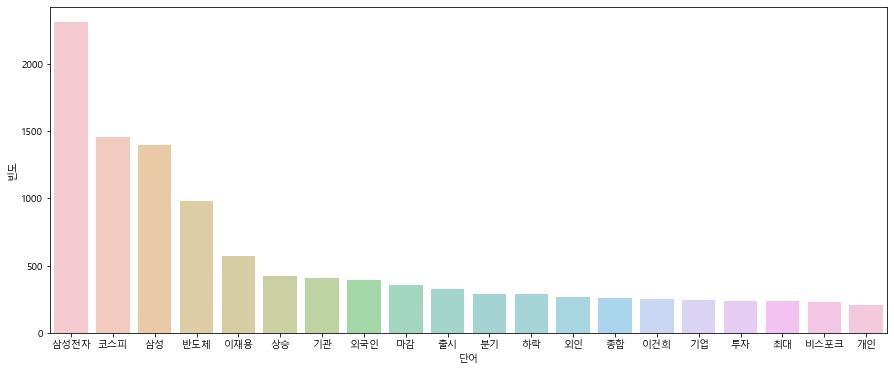

In [51]:
a = word_count.sort_values('빈도',ascending=False).reset_index().drop('index',axis=1).iloc[:20,:]
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='단어',y='빈도', data=a, alpha=0.5)  

##### TF_IDF

In [52]:
tfidf = TfidfVectorizer(max_features = 1000, stop_words='english')

In [53]:
tdm = tfidf.fit_transform(df['제목'])

In [54]:
word_count = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    'tf-idf': tdm.sum(axis=0).flat
})

In [55]:
word_count.sort_values('tf-idf',ascending=False).head()

,단어,tf-idf
399,삼성전자,547.946833
388,삼성,405.565526
868,코스피,375.863828
315,반도체,320.518866
656,이재용,195.214334


<AxesSubplot:xlabel='단어', ylabel='tf-idf'>

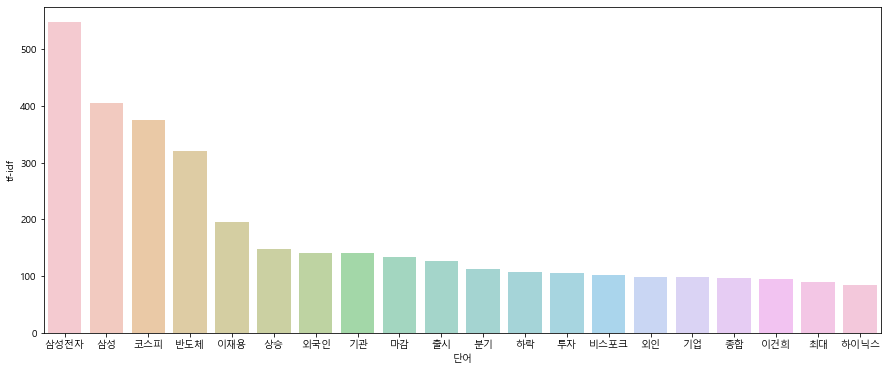

In [59]:
a = word_count.sort_values('tf-idf',ascending=False).reset_index().drop('index',axis=1).iloc[:20,:]
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='단어',y='tf-idf', data=a, alpha=0.5)  

##### nlp

In [60]:
nlp = spacy.load("en_core_web_sm")

In [61]:
words = []

In [63]:
cv = CountVectorizer(max_features=1000, tokenizer=extract_nv)

In [64]:
tdm = cv.fit_transform(df['제목'])

In [65]:
word_count = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

In [66]:
word_count.sort_values('빈도',ascending=False).head()

,단어,빈도
399,삼성전자,2236
862,코로나,942
299,몸값,700
660,인공지능,561
440,선봬,439


<AxesSubplot:xlabel='단어', ylabel='빈도'>

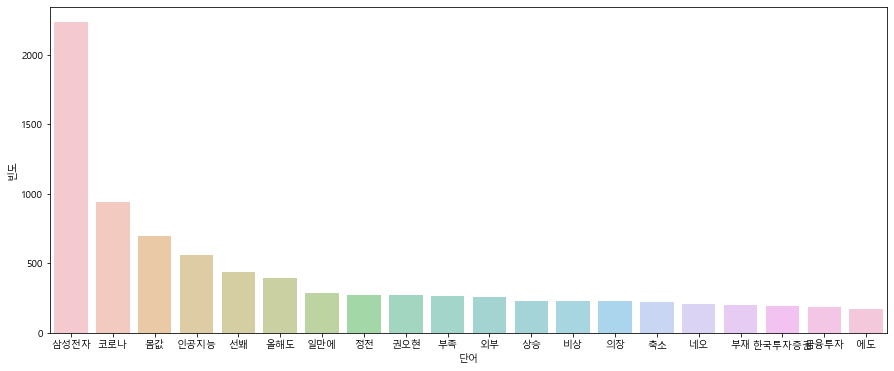

In [67]:
a = word_count.sort_values('빈도',ascending=False).reset_index().drop('index',axis=1).iloc[:20,:]
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='단어',y='빈도', data=a, alpha=0.5)  

##### kiwi

In [87]:
kiwi = Kiwi()

In [88]:
kiwi.prepare()

0

In [89]:
cv = TfidfVectorizer(max_features = 1000,tokenizer=extract_noun_kiwi)

In [90]:
tdm = cv.fit_transform(df['제목'])

In [91]:
tdm.sum()

22673.514759510486

In [92]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat # 표를 평평하게 만듬
})

In [93]:
word_count.sort_values('빈도',ascending=False)

,단어,빈도
400,삼성전자,508.227271
394,삼성,378.773203
862,코스,371.546451
302,반도체,301.522101
132,기업,178.717140
...,...,...
307,방안,5.996660
987,회계,5.973385
961,현지,5.594455
82,공조,5.499024


<AxesSubplot:xlabel='단어', ylabel='빈도'>

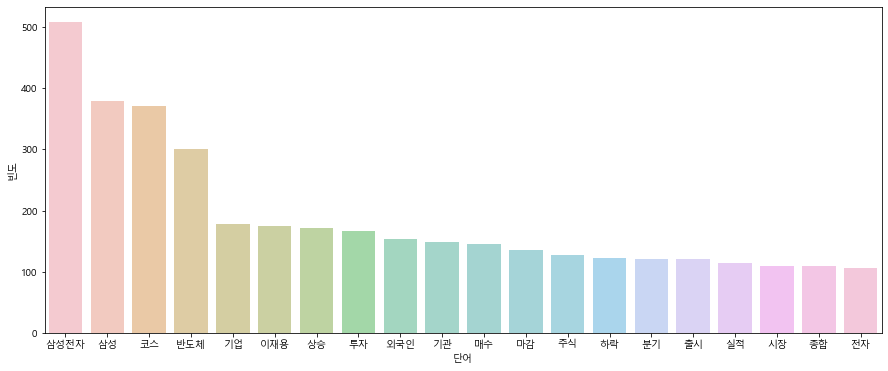

In [94]:
a = word_count.sort_values('빈도',ascending=False).reset_index().drop('index',axis=1).iloc[:20,:]
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='단어',y='빈도', data=a, alpha=0.5)  

##### stanza

In [95]:
stanza.download('ko')

2021-04-29 13:09:36 INFO: Downloading default packages for language: ko (Korean)...
2021-04-29 13:09:37 INFO: File exists: C:\Users\pc\stanza_resources\ko\default.zip.
2021-04-29 13:09:38 INFO: Finished downloading models and saved to C:\Users\pc\stanza_resources.


In [96]:
nlp = stanza.Pipeline('ko')

2021-04-29 13:09:38 INFO: Loading these models for language: ko (Korean):
| Processor | Package |
-----------------------
| tokenize  | kaist   |
| pos       | kaist   |
| lemma     | kaist   |
| depparse  | kaist   |

2021-04-29 13:09:38 INFO: Use device: gpu
2021-04-29 13:09:38 INFO: Loading: tokenize
2021-04-29 13:09:38 INFO: Loading: pos
2021-04-29 13:09:38 INFO: Loading: lemma
2021-04-29 13:09:38 INFO: Loading: depparse
2021-04-29 13:09:38 INFO: Done loading processors!


In [97]:
stanza.download('ko', package='gsd')
nlp = stanza.Pipeline('ko', package='gsd')

2021-04-29 13:09:38 INFO: Downloading these customized packages for language: ko (Korean)...
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| pos       | gsd     |
| lemma     | gsd     |
| depparse  | gsd     |
| pretrain  | gsd     |

2021-04-29 13:09:38 INFO: File exists: C:\Users\pc\stanza_resources\ko\tokenize\gsd.pt.
2021-04-29 13:09:38 INFO: File exists: C:\Users\pc\stanza_resources\ko\pos\gsd.pt.
2021-04-29 13:09:38 INFO: File exists: C:\Users\pc\stanza_resources\ko\lemma\gsd.pt.
2021-04-29 13:09:39 INFO: File exists: C:\Users\pc\stanza_resources\ko\depparse\gsd.pt.
2021-04-29 13:09:39 INFO: File exists: C:\Users\pc\stanza_resources\ko\pretrain\gsd.pt.
2021-04-29 13:09:39 INFO: Finished downloading models and saved to C:\Users\pc\stanza_resources.
2021-04-29 13:09:39 INFO: Loading these models for language: ko (Korean):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| pos       | gsd     |
| lemma     | gsd     |
| depparse  | g

In [98]:
cv = TfidfVectorizer(max_features = 1000,tokenizer=extract_noun_stanza)

In [99]:
tdm = cv.fit_transform(df['제목'])

In [100]:
tdm.sum()

21541.059024288537

In [101]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat # 표를 평평하게 만듬
})

In [102]:
word_count.sort_values('빈도',ascending=False)

,단어,빈도
399,삼성전자,534.007198
393,삼성,389.020218
864,코스피,373.909740
305,반도체,288.150727
648,이재용,184.128022
...,...,...
749,종가,5.858405
331,보호청,5.847219
134,기초,5.809349
91,구내,5.675949


<AxesSubplot:xlabel='단어', ylabel='빈도'>

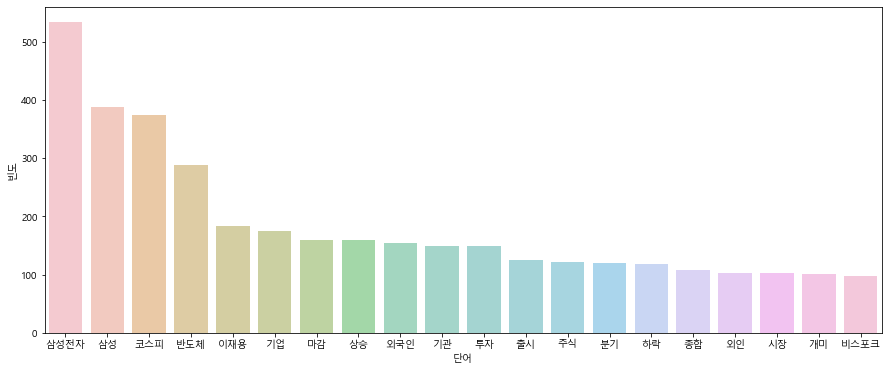

In [103]:
a = word_count.sort_values('빈도',ascending=False).reset_index().drop('index',axis=1).iloc[:20,:]
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='단어',y='빈도', data=a, alpha=0.5)  

### original label

### 상승

In [124]:
df_1 = df.query('label==1')
df_1.shape

(4835, 7)

##### countvectorizer

In [105]:
cv = CountVectorizer(max_features = 1000,)

In [106]:
tdm = cv.fit_transform(df_1['제목'])

In [107]:
tdm.sum()

20682

In [108]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat # 표를 평평하게 만듬
})

In [109]:
word_count.sort_values('빈도',ascending=False)

,단어,빈도
397,삼성전자,915
864,코스피,703
389,삼성,620
316,반도체,491
410,상승,272
...,...,...
265,만든,6
591,오른다,6
897,팝업스토어,6
186,눈독,6


<AxesSubplot:xlabel='단어', ylabel='빈도'>

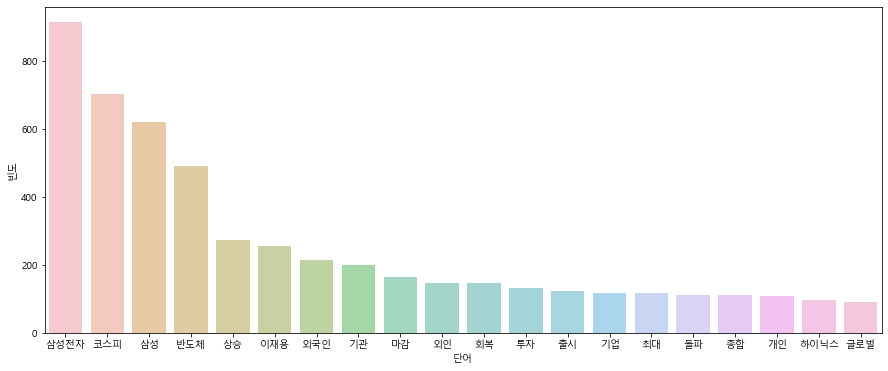

In [110]:
a = word_count.sort_values('빈도',ascending=False).reset_index().drop('index',axis=1).iloc[:20,:]
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='단어',y='빈도', data=a, alpha=0.5)  

##### TF_IDF

In [111]:
tfidf = TfidfVectorizer(max_features = 1000, stop_words='english')

In [112]:
tdm = tfidf.fit_transform(df_1['제목'])

In [113]:
word_count = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    'tf-idf': tdm.sum(axis=0).flat
})

In [114]:
word_count.sort_values('tf-idf',ascending=False).head()

,단어,tf-idf
400,삼성전자,221.385910
864,코스피,183.256646
392,삼성,179.204552
318,반도체,149.595919
413,상승,91.257362


<AxesSubplot:xlabel='단어', ylabel='tf-idf'>

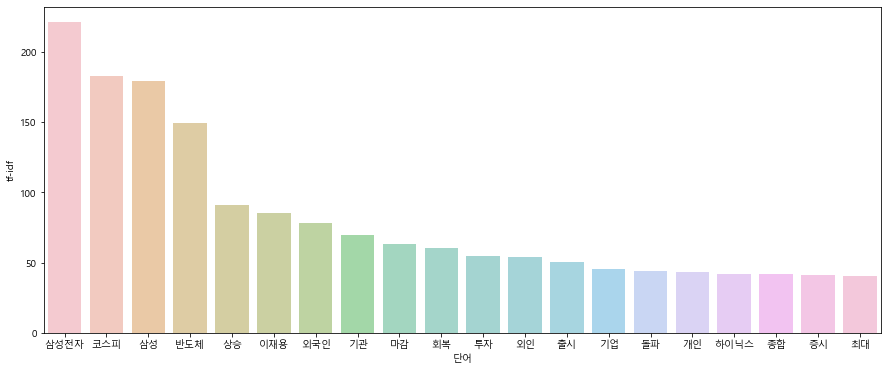

In [115]:
a = word_count.sort_values('tf-idf',ascending=False).reset_index().drop('index',axis=1).iloc[:20,:]
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='단어',y='tf-idf', data=a, alpha=0.5)  

##### nlp

In [131]:
nlp = spacy.load("en_core_web_sm")

In [132]:
words = []

In [133]:
cv = CountVectorizer(max_features=1000, tokenizer=extract_nv)

In [134]:
tdm = cv.fit_transform(df_1['제목'])

In [135]:
word_count = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

In [136]:
word_count.sort_values('빈도',ascending=False).head()

,단어,빈도
404,삼성전자에,896
879,텍사스,460
304,무선청소기,360
672,인증,252
615,요청,214


<AxesSubplot:xlabel='단어', ylabel='빈도'>

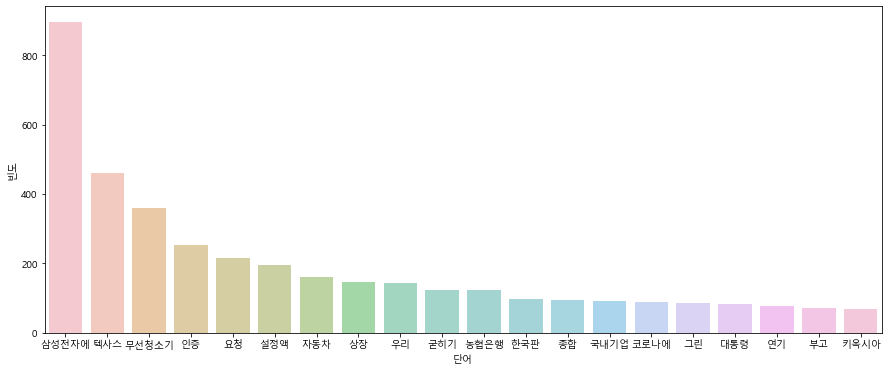

In [137]:
a = word_count.sort_values('빈도',ascending=False).reset_index().drop('index',axis=1).iloc[:20,:]
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='단어',y='빈도', data=a, alpha=0.5)  

##### kiwi

In [138]:
kiwi = Kiwi()

In [139]:
kiwi.prepare()

0

In [140]:
cv = TfidfVectorizer(max_features = 1000,tokenizer=extract_noun_kiwi)

In [141]:
tdm = cv.fit_transform(df_1['제목'])

In [142]:
tdm.sum()

10651.76217131345

In [143]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat # 표를 평평하게 만듬
})

In [144]:
word_count.sort_values('빈도',ascending=False)

,단어,빈도
410,삼성전자,211.997524
867,코스,181.241280
406,삼성,175.697838
307,반도체,143.676255
415,상승,103.240912
...,...,...
259,만주,2.702708
727,접견,2.651737
286,무리,2.611686
910,포럼,2.590075


<AxesSubplot:xlabel='단어', ylabel='빈도'>

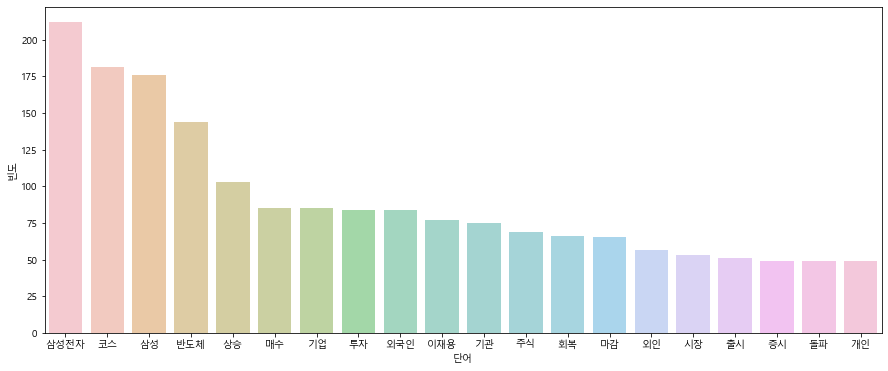

In [145]:
a = word_count.sort_values('빈도',ascending=False).reset_index().drop('index',axis=1).iloc[:20,:]
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='단어',y='빈도', data=a, alpha=0.5)  

##### stanza

In [146]:
stanza.download('ko')

2021-04-29 13:18:52 INFO: Downloading default packages for language: ko (Korean)...
2021-04-29 13:18:53 INFO: File exists: C:\Users\pc\stanza_resources\ko\default.zip.
2021-04-29 13:18:54 INFO: Finished downloading models and saved to C:\Users\pc\stanza_resources.


In [147]:
nlp = stanza.Pipeline('ko')

2021-04-29 13:18:54 INFO: Loading these models for language: ko (Korean):
| Processor | Package |
-----------------------
| tokenize  | kaist   |
| pos       | kaist   |
| lemma     | kaist   |
| depparse  | kaist   |

2021-04-29 13:18:54 INFO: Use device: gpu
2021-04-29 13:18:54 INFO: Loading: tokenize
2021-04-29 13:18:54 INFO: Loading: pos
2021-04-29 13:18:54 INFO: Loading: lemma
2021-04-29 13:18:54 INFO: Loading: depparse
2021-04-29 13:18:54 INFO: Done loading processors!


In [148]:
stanza.download('ko', package='gsd')
nlp = stanza.Pipeline('ko', package='gsd')

2021-04-29 13:18:55 INFO: Downloading these customized packages for language: ko (Korean)...
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| pos       | gsd     |
| lemma     | gsd     |
| depparse  | gsd     |
| pretrain  | gsd     |

2021-04-29 13:18:55 INFO: File exists: C:\Users\pc\stanza_resources\ko\tokenize\gsd.pt.
2021-04-29 13:18:55 INFO: File exists: C:\Users\pc\stanza_resources\ko\pos\gsd.pt.
2021-04-29 13:18:55 INFO: File exists: C:\Users\pc\stanza_resources\ko\lemma\gsd.pt.
2021-04-29 13:18:55 INFO: File exists: C:\Users\pc\stanza_resources\ko\depparse\gsd.pt.
2021-04-29 13:18:55 INFO: File exists: C:\Users\pc\stanza_resources\ko\pretrain\gsd.pt.
2021-04-29 13:18:55 INFO: Finished downloading models and saved to C:\Users\pc\stanza_resources.
2021-04-29 13:18:55 INFO: Loading these models for language: ko (Korean):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| pos       | gsd     |
| lemma     | gsd     |
| depparse  | g

In [149]:
cv = TfidfVectorizer(max_features = 1000,tokenizer=extract_noun_stanza)

In [150]:
tdm = cv.fit_transform(df_1['제목'])

In [151]:
tdm.sum()

10177.136731193834

In [152]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat # 표를 평평하게 만듬
})

In [153]:
word_count.sort_values('빈도',ascending=False)

,단어,빈도
409,삼성전자,221.987240
872,코스피,180.017939
404,삼성,174.478866
311,반도체,139.594645
416,상승,95.917668
...,...,...
297,미래기술육,2.783062
362,분당,2.696090
901,파워센터,2.696090
289,무리,2.569005


<AxesSubplot:xlabel='단어', ylabel='빈도'>

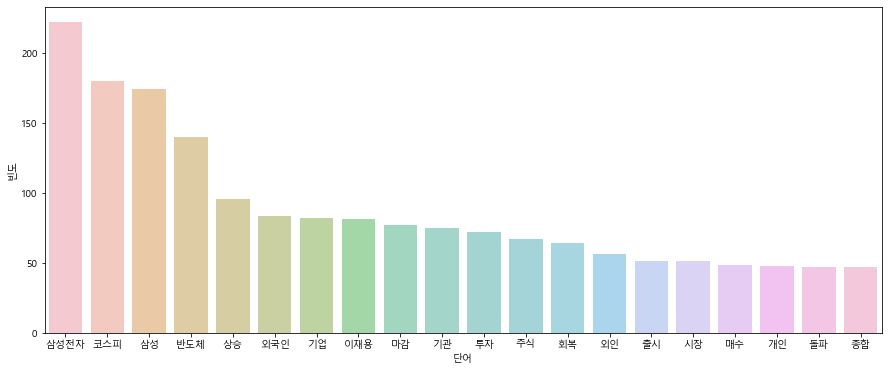

In [154]:
a = word_count.sort_values('빈도',ascending=False).reset_index().drop('index',axis=1).iloc[:20,:]
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='단어',y='빈도', data=a, alpha=0.5)  

### 하강

In [155]:
df_0 = df.query('label==0')
df_0.shape

(5556, 7)

##### countvectorizer

In [156]:
cv = CountVectorizer(max_features = 1000,)

In [157]:
tdm = cv.fit_transform(df_0['제목'])

In [158]:
tdm.sum()

23907

In [159]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat # 표를 평평하게 만듬
})

In [160]:
word_count.sort_values('빈도',ascending=False)

,단어,빈도
404,삼성전자,1396
393,삼성,777
871,코스피,754
308,반도체,486
663,이재용,317
...,...,...
929,필요한,6
348,부문,6
354,부총리에,6
360,불명확,6


<AxesSubplot:xlabel='단어', ylabel='빈도'>

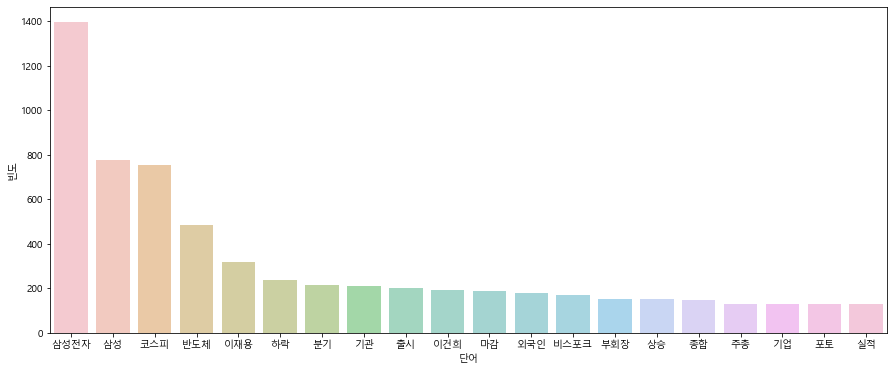

In [161]:
a = word_count.sort_values('빈도',ascending=False).reset_index().drop('index',axis=1).iloc[:20,:]
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='단어',y='빈도', data=a, alpha=0.5)  

##### TF_IDF

In [162]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [163]:
tfidf = TfidfVectorizer(max_features = 1000, stop_words='english')

In [164]:
tdm = tfidf.fit_transform(df_0['제목'])

In [165]:
word_count = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    'tf-idf': tdm.sum(axis=0).flat
})

In [166]:
word_count.sort_values('tf-idf',ascending=False).head()

,단어,tf-idf
407,삼성전자,313.507400
397,삼성,217.804693
874,코스피,193.488416
310,반도체,159.554291
657,이재용,105.431601


<AxesSubplot:xlabel='단어', ylabel='tf-idf'>

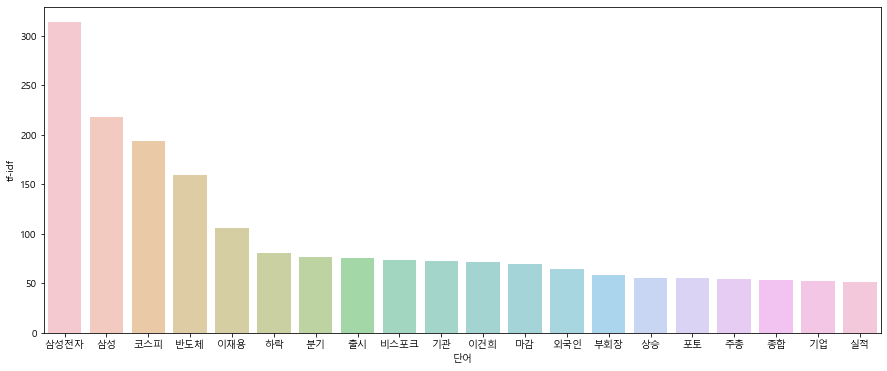

In [167]:
a = word_count.sort_values('tf-idf',ascending=False).reset_index().drop('index',axis=1).iloc[:20,:]
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='단어',y='tf-idf', data=a, alpha=0.5)  

##### nlp

In [168]:
nlp = spacy.load("en_core_web_sm")

In [169]:
words = []

In [170]:
cv = CountVectorizer(max_features=1000, tokenizer=extract_nv)

In [171]:
tdm = cv.fit_transform(df_0['제목'])

In [172]:
word_count = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

In [173]:
word_count.sort_values('빈도',ascending=False).head()

,단어,빈도
402,삼성은,1340
882,키옥시아,482
293,무선청소기,340
663,인기,309
444,선물,243


<AxesSubplot:xlabel='단어', ylabel='빈도'>

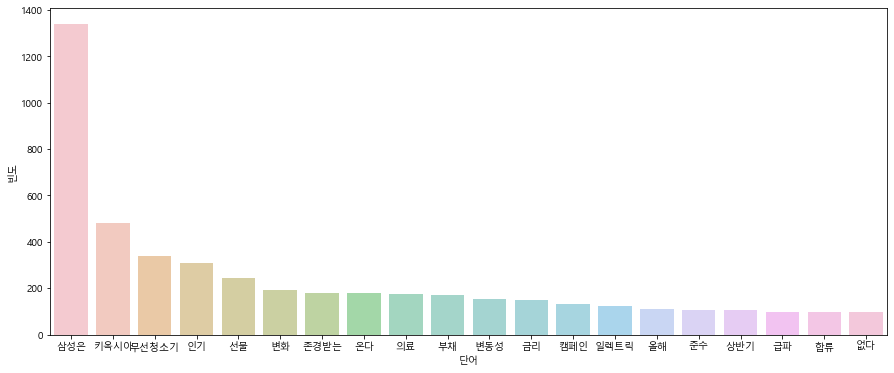

In [174]:
a = word_count.sort_values('빈도',ascending=False).reset_index().drop('index',axis=1).iloc[:20,:]
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='단어',y='빈도', data=a, alpha=0.5)  

##### kiwi

In [175]:
kiwi = Kiwi()

In [176]:
kiwi.prepare()

0

In [177]:
cv = TfidfVectorizer(max_features = 1000,tokenizer=extract_noun_kiwi)

In [178]:
tdm = cv.fit_transform(df_0['제목'])

In [179]:
tdm.sum()

12319.200024830638

In [180]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat # 표를 평평하게 만듬
})

In [181]:
word_count.sort_values('빈도',ascending=False)

,단어,빈도
399,삼성전자,290.468643
394,삼성,199.525338
867,코스,194.203294
301,반도체,154.108413
647,이재용,96.048989
...,...,...
463,소아,3.153490
512,신라,3.088578
722,절차,2.998391
909,퍼포먼스,2.989692


<AxesSubplot:xlabel='단어', ylabel='빈도'>

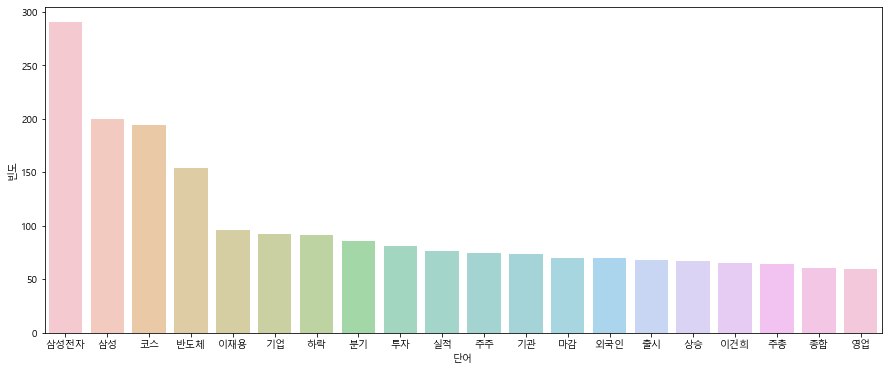

In [182]:
a = word_count.sort_values('빈도',ascending=False).reset_index().drop('index',axis=1).iloc[:20,:]
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='단어',y='빈도', data=a, alpha=0.5)  

##### stanza

In [183]:
stanza.download('ko')

2021-04-29 13:21:51 INFO: Downloading default packages for language: ko (Korean)...
2021-04-29 13:21:51 INFO: File exists: C:\Users\pc\stanza_resources\ko\default.zip.
2021-04-29 13:21:52 INFO: Finished downloading models and saved to C:\Users\pc\stanza_resources.


In [184]:
nlp = stanza.Pipeline('ko')

2021-04-29 13:21:52 INFO: Loading these models for language: ko (Korean):
| Processor | Package |
-----------------------
| tokenize  | kaist   |
| pos       | kaist   |
| lemma     | kaist   |
| depparse  | kaist   |

2021-04-29 13:21:52 INFO: Use device: gpu
2021-04-29 13:21:52 INFO: Loading: tokenize
2021-04-29 13:21:52 INFO: Loading: pos
2021-04-29 13:21:53 INFO: Loading: lemma
2021-04-29 13:21:53 INFO: Loading: depparse
2021-04-29 13:21:53 INFO: Done loading processors!


In [185]:
stanza.download('ko', package='gsd')
nlp = stanza.Pipeline('ko', package='gsd')

2021-04-29 13:21:53 INFO: Downloading these customized packages for language: ko (Korean)...
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| pos       | gsd     |
| lemma     | gsd     |
| depparse  | gsd     |
| pretrain  | gsd     |

2021-04-29 13:21:53 INFO: File exists: C:\Users\pc\stanza_resources\ko\tokenize\gsd.pt.
2021-04-29 13:21:53 INFO: File exists: C:\Users\pc\stanza_resources\ko\pos\gsd.pt.
2021-04-29 13:21:53 INFO: File exists: C:\Users\pc\stanza_resources\ko\lemma\gsd.pt.
2021-04-29 13:21:53 INFO: File exists: C:\Users\pc\stanza_resources\ko\depparse\gsd.pt.
2021-04-29 13:21:53 INFO: File exists: C:\Users\pc\stanza_resources\ko\pretrain\gsd.pt.
2021-04-29 13:21:53 INFO: Finished downloading models and saved to C:\Users\pc\stanza_resources.
2021-04-29 13:21:53 INFO: Loading these models for language: ko (Korean):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| pos       | gsd     |
| lemma     | gsd     |
| depparse  | g

In [186]:
cv = TfidfVectorizer(max_features = 1000,tokenizer=extract_noun_stanza)

In [187]:
tdm = cv.fit_transform(df_0['제목'])

In [188]:
tdm.sum()

11740.66300116648

In [189]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat # 표를 평평하게 만듬
})

In [190]:
word_count.sort_values('빈도',ascending=False)

,단어,빈도
395,삼성전자,304.697357
390,삼성,207.042496
870,코스피,194.787902
297,반도체,148.785362
649,이재용,99.369836
...,...,...
730,정식,3.079532
790,지배력,3.076244
267,모델,3.008128
634,이노,2.921937


<AxesSubplot:xlabel='단어', ylabel='빈도'>

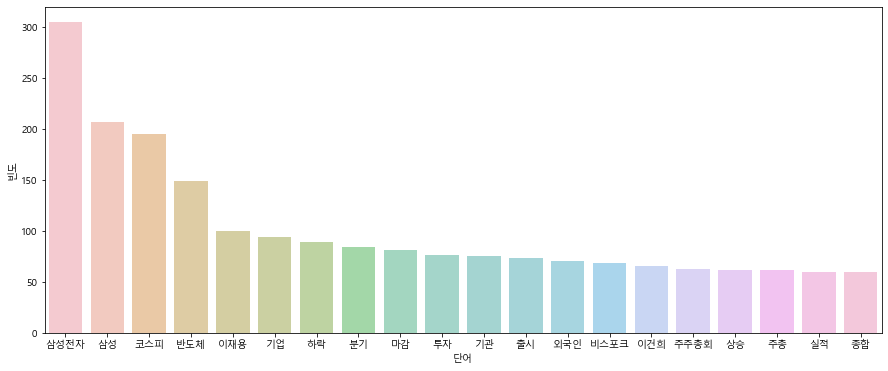

In [191]:
a = word_count.sort_values('빈도',ascending=False).reset_index().drop('index',axis=1).iloc[:20,:]
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='단어',y='빈도', data=a, alpha=0.5)  

# New_label

### 상승

In [192]:
df_1 = df.query('new_label==1')
df_1.shape

(4107, 7)

##### countvectorizer

In [193]:
cv = CountVectorizer(max_features = 1000,)

In [194]:
tdm = cv.fit_transform(df_1['제목'])

In [195]:
tdm.sum()

17899

In [196]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat # 표를 평평하게 만듬
})

In [197]:
word_count.sort_values('빈도',ascending=False)

,단어,빈도
394,삼성전자,839
866,코스피,601
387,삼성,494
308,반도체,412
405,상승,222
...,...,...
508,신입,5
865,코스닥은,5
15,가세,5
867,코아시아,5


<AxesSubplot:xlabel='단어', ylabel='빈도'>

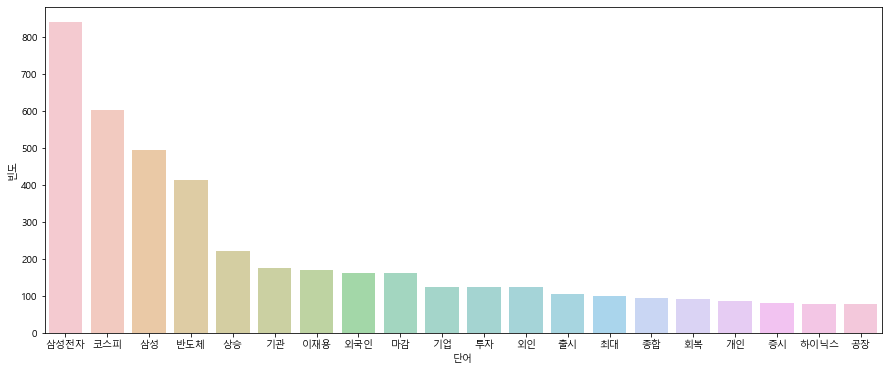

In [198]:
a = word_count.sort_values('빈도',ascending=False).reset_index().drop('index',axis=1).iloc[:20,:]
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='단어',y='빈도', data=a, alpha=0.5)  

##### TF_IDF

In [199]:
tfidf = TfidfVectorizer(max_features = 1000)

In [200]:
tdm = tfidf.fit_transform(df_1['제목'])

In [201]:
word_count = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    'tf-idf': tdm.sum(axis=0).flat
})

In [202]:
word_count.sort_values('tf-idf',ascending=False).head()

,단어,tf-idf
394,삼성전자,191.812935
866,코스피,153.864290
387,삼성,145.905719
308,반도체,122.162030
405,상승,72.908766


<AxesSubplot:xlabel='단어', ylabel='tf-idf'>

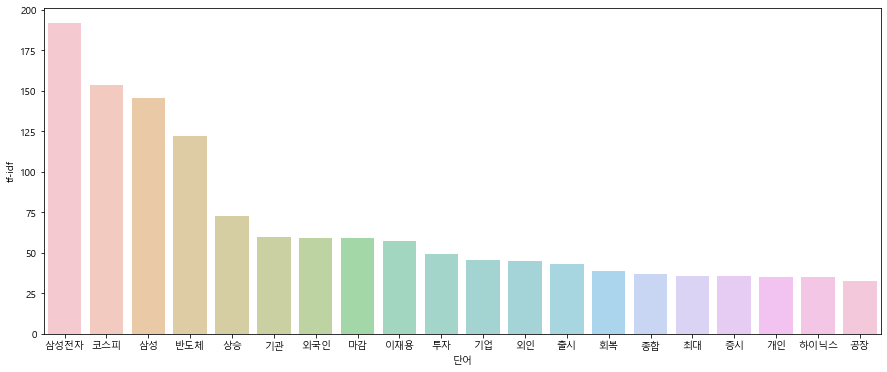

In [203]:
a = word_count.sort_values('tf-idf',ascending=False).reset_index().drop('index',axis=1).iloc[:20,:]
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='단어',y='tf-idf', data=a, alpha=0.5)  

##### nlp

In [204]:
nlp = spacy.load("en_core_web_sm")

In [205]:
words = []

In [206]:
cv = CountVectorizer(max_features=1000, tokenizer=extract_nv)

In [207]:
tdm = cv.fit_transform(df_1['제목'])

In [208]:
word_count = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

In [209]:
word_count.sort_values('빈도',ascending=False).head()

,단어,빈도
380,사외이사,828
888,투자자,395
284,모바일,294
666,인수,167
420,샤오미,163


<AxesSubplot:xlabel='단어', ylabel='빈도'>

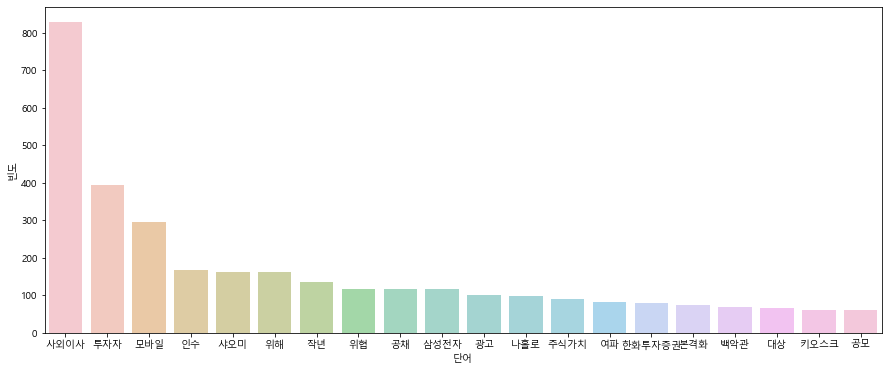

In [210]:
a = word_count.sort_values('빈도',ascending=False).reset_index().drop('index',axis=1).iloc[:20,:]
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='단어',y='빈도', data=a, alpha=0.5)  

##### kiwi

In [211]:
kiwi = Kiwi()

In [212]:
kiwi.prepare()

0

In [213]:
cv = TfidfVectorizer(max_features = 1000,tokenizer=extract_noun_kiwi)

In [214]:
tdm = cv.fit_transform(df_1['제목'])

In [215]:
tdm.sum()

9177.695713607816

In [216]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat # 표를 평평하게 만듬
})

In [217]:
word_count.sort_values('빈도',ascending=False)

,단어,빈도
407,삼성전자,184.407766
863,코스,154.162966
404,삼성,141.662244
303,반도체,115.193318
412,상승,84.769766
...,...,...
250,만주,2.221900
496,스타일,2.198006
569,연기,2.183549
349,부부,2.160262


<AxesSubplot:xlabel='단어', ylabel='빈도'>

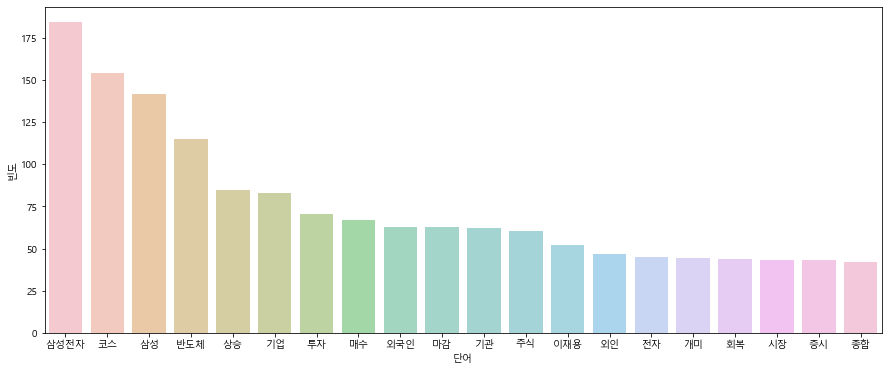

In [218]:
a = word_count.sort_values('빈도',ascending=False).reset_index().drop('index',axis=1).iloc[:20,:]
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='단어',y='빈도', data=a, alpha=0.5)  

##### stanza

In [219]:
stanza.download('ko')

2021-04-29 13:25:03 INFO: Downloading default packages for language: ko (Korean)...
2021-04-29 13:25:03 INFO: File exists: C:\Users\pc\stanza_resources\ko\default.zip.
2021-04-29 13:25:04 INFO: Finished downloading models and saved to C:\Users\pc\stanza_resources.


In [220]:
nlp = stanza.Pipeline('ko')

2021-04-29 13:25:04 INFO: Loading these models for language: ko (Korean):
| Processor | Package |
-----------------------
| tokenize  | kaist   |
| pos       | kaist   |
| lemma     | kaist   |
| depparse  | kaist   |

2021-04-29 13:25:04 INFO: Use device: gpu
2021-04-29 13:25:04 INFO: Loading: tokenize
2021-04-29 13:25:04 INFO: Loading: pos
2021-04-29 13:25:04 INFO: Loading: lemma
2021-04-29 13:25:04 INFO: Loading: depparse
2021-04-29 13:25:05 INFO: Done loading processors!


In [221]:
stanza.download('ko', package='gsd')
nlp = stanza.Pipeline('ko', package='gsd')

2021-04-29 13:25:05 INFO: Downloading these customized packages for language: ko (Korean)...
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| pos       | gsd     |
| lemma     | gsd     |
| depparse  | gsd     |
| pretrain  | gsd     |

2021-04-29 13:25:05 INFO: File exists: C:\Users\pc\stanza_resources\ko\tokenize\gsd.pt.
2021-04-29 13:25:05 INFO: File exists: C:\Users\pc\stanza_resources\ko\pos\gsd.pt.
2021-04-29 13:25:05 INFO: File exists: C:\Users\pc\stanza_resources\ko\lemma\gsd.pt.
2021-04-29 13:25:05 INFO: File exists: C:\Users\pc\stanza_resources\ko\depparse\gsd.pt.
2021-04-29 13:25:05 INFO: File exists: C:\Users\pc\stanza_resources\ko\pretrain\gsd.pt.
2021-04-29 13:25:05 INFO: Finished downloading models and saved to C:\Users\pc\stanza_resources.
2021-04-29 13:25:05 INFO: Loading these models for language: ko (Korean):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| pos       | gsd     |
| lemma     | gsd     |
| depparse  | g

In [222]:
cv = TfidfVectorizer(max_features = 1000,tokenizer=extract_noun_stanza)

In [223]:
tdm = cv.fit_transform(df_1['제목'])

In [224]:
tdm.sum()

8735.67821846874

In [225]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat # 표를 평평하게 만듬
})

In [226]:
word_count.sort_values('빈도',ascending=False)

,단어,빈도
397,삼성전자,195.954029
870,코스피,155.284359
394,삼성,142.053633
313,반도체,113.476555
130,기업,82.577993
...,...,...
234,따르,2.274157
393,살펴보,2.269141
594,예비,2.205545
294,미디어텍,2.128212


<AxesSubplot:xlabel='단어', ylabel='빈도'>

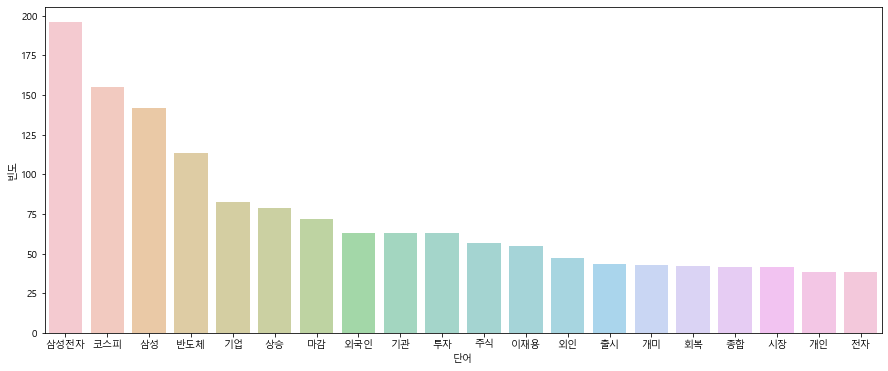

In [227]:
a = word_count.sort_values('빈도',ascending=False).reset_index().drop('index',axis=1).iloc[:20,:]
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='단어',y='빈도', data=a, alpha=0.5)  

### 하강

In [228]:
df_0 = df.query('new_label==0')
df_0.shape

(6284, 7)

##### countvectorizer

In [229]:
cv = CountVectorizer(max_features = 1000,)

In [230]:
tdm = cv.fit_transform(df_0['제목'])

In [231]:
tdm.sum()

26675

In [232]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat # 표를 평평하게 만듬
})

In [233]:
word_count.sort_values('빈도',ascending=False)

,단어,빈도
411,삼성전자,1472
400,삼성,903
867,코스피,856
312,반도체,565
666,이재용,403
...,...,...
566,얼마나,7
569,업사이클링,7
587,역량,7
624,왕좌,7


<AxesSubplot:xlabel='단어', ylabel='빈도'>

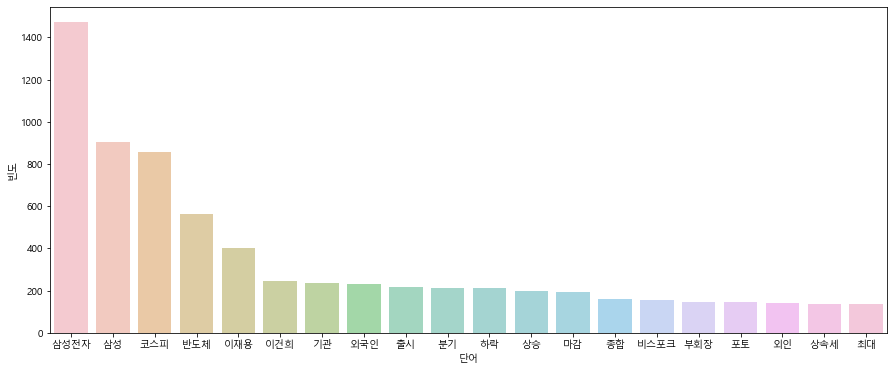

In [234]:
a = word_count.sort_values('빈도',ascending=False).reset_index().drop('index',axis=1).iloc[:20,:]
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='단어',y='빈도', data=a, alpha=0.5)  

##### TF_IDF

In [235]:
tfidf = TfidfVectorizer(max_features = 1000)

In [236]:
tdm = tfidf.fit_transform(df_0['제목'])

In [237]:
word_count = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    'tf-idf': tdm.sum(axis=0).flat
})

In [238]:
word_count.sort_values('tf-idf',ascending=False).head()

,단어,tf-idf
411,삼성전자,342.168221
400,삼성,247.633259
867,코스피,220.913483
312,반도체,187.836313
666,이재용,126.042990


<AxesSubplot:xlabel='단어', ylabel='tf-idf'>

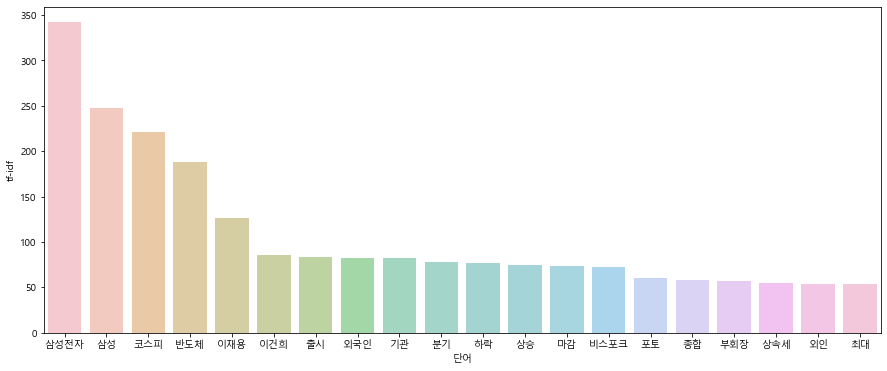

In [239]:
a = word_count.sort_values('tf-idf',ascending=False).reset_index().drop('index',axis=1).iloc[:20,:]
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='단어',y='tf-idf', data=a, alpha=0.5)  

##### nlp

In [240]:
nlp = spacy.load("en_core_web_sm")

In [241]:
words = []

In [242]:
cv = CountVectorizer(max_features=1000, tokenizer=extract_nv)

In [243]:
tdm = cv.fit_transform(df_0['제목'])

In [244]:
word_count = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

In [245]:
word_count.sort_values('빈도',ascending=False).head()

,단어,빈도
403,삼성생명,1408
879,턱밑,547
297,미니,406
672,인센티브,394
444,서버용,276


<AxesSubplot:xlabel='단어', ylabel='빈도'>

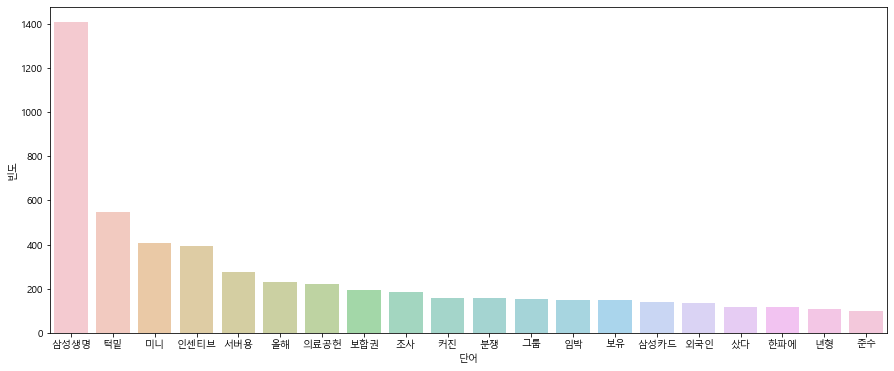

In [246]:
a = word_count.sort_values('빈도',ascending=False).reset_index().drop('index',axis=1).iloc[:20,:]
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='단어',y='빈도', data=a, alpha=0.5)  

##### kiwi

In [247]:
kiwi = Kiwi()

In [248]:
kiwi.prepare()

0

In [249]:
cv = TfidfVectorizer(max_features = 1000,tokenizer=extract_noun_kiwi)

In [250]:
tdm = cv.fit_transform(df_0['제목'])

In [251]:
tdm.sum()

13839.263021271961

In [252]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat # 표를 평평하게 만듬
})

In [253]:
word_count.sort_values('빈도',ascending=False)

,단어,빈도
400,삼성전자,317.585050
394,삼성,234.671882
866,코스,218.284329
299,반도체,180.171590
647,이재용,115.818516
...,...,...
739,조간,3.684983
601,외환,3.624820
222,동유럽,3.561382
650,인공,3.538368


<AxesSubplot:xlabel='단어', ylabel='빈도'>

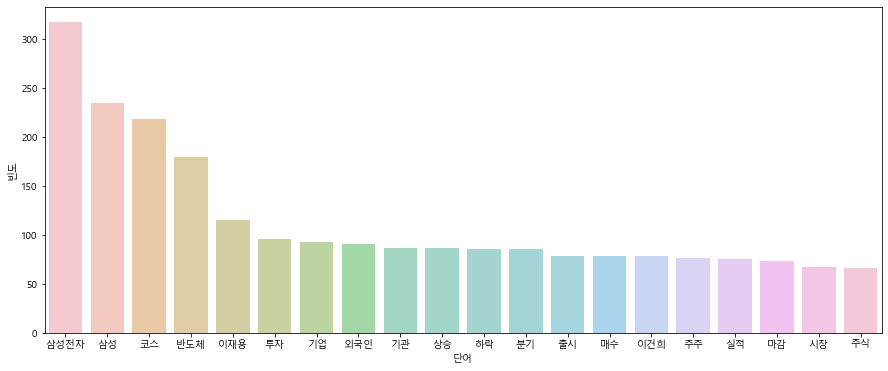

In [254]:
a = word_count.sort_values('빈도',ascending=False).reset_index().drop('index',axis=1).iloc[:20,:]
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='단어',y='빈도', data=a, alpha=0.5)  

##### stanza

In [255]:
stanza.download('ko')

2021-04-29 13:27:39 INFO: Downloading default packages for language: ko (Korean)...
2021-04-29 13:27:39 INFO: File exists: C:\Users\pc\stanza_resources\ko\default.zip.
2021-04-29 13:27:40 INFO: Finished downloading models and saved to C:\Users\pc\stanza_resources.


In [256]:
nlp = stanza.Pipeline('ko')

2021-04-29 13:27:40 INFO: Loading these models for language: ko (Korean):
| Processor | Package |
-----------------------
| tokenize  | kaist   |
| pos       | kaist   |
| lemma     | kaist   |
| depparse  | kaist   |

2021-04-29 13:27:40 INFO: Use device: gpu
2021-04-29 13:27:40 INFO: Loading: tokenize
2021-04-29 13:27:40 INFO: Loading: pos
2021-04-29 13:27:41 INFO: Loading: lemma
2021-04-29 13:27:41 INFO: Loading: depparse
2021-04-29 13:27:41 INFO: Done loading processors!


In [257]:
stanza.download('ko', package='gsd')
nlp = stanza.Pipeline('ko', package='gsd')

2021-04-29 13:27:41 INFO: Downloading these customized packages for language: ko (Korean)...
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| pos       | gsd     |
| lemma     | gsd     |
| depparse  | gsd     |
| pretrain  | gsd     |

2021-04-29 13:27:41 INFO: File exists: C:\Users\pc\stanza_resources\ko\tokenize\gsd.pt.
2021-04-29 13:27:41 INFO: File exists: C:\Users\pc\stanza_resources\ko\pos\gsd.pt.
2021-04-29 13:27:41 INFO: File exists: C:\Users\pc\stanza_resources\ko\lemma\gsd.pt.
2021-04-29 13:27:41 INFO: File exists: C:\Users\pc\stanza_resources\ko\depparse\gsd.pt.
2021-04-29 13:27:41 INFO: File exists: C:\Users\pc\stanza_resources\ko\pretrain\gsd.pt.
2021-04-29 13:27:41 INFO: Finished downloading models and saved to C:\Users\pc\stanza_resources.
2021-04-29 13:27:41 INFO: Loading these models for language: ko (Korean):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| pos       | gsd     |
| lemma     | gsd     |
| depparse  | g

In [258]:
cv = TfidfVectorizer(max_features = 1000,tokenizer=extract_noun)

In [259]:
tdm = cv.fit_transform(df_0['제목'])

In [260]:
tdm.sum()

13202.288056698151

In [261]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat # 표를 평평하게 만듬
})

In [262]:
word_count.sort_values('빈도',ascending=False)

,단어,빈도
412,삼성전자,332.135064
406,삼성,240.461397
870,코스피,217.749127
307,반도체,171.696395
660,이재용,121.922165
...,...,...
316,방안,3.382933
551,약간좋음,3.320384
305,박찬종,3.285637
578,역량,3.281537


<AxesSubplot:xlabel='단어', ylabel='빈도'>

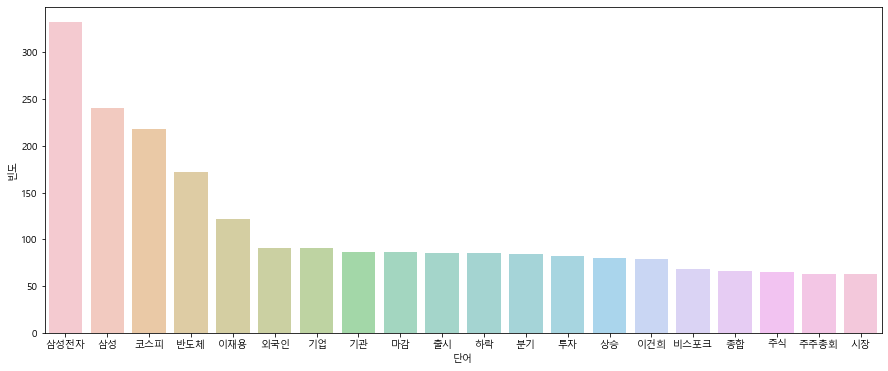

In [263]:
a = word_count.sort_values('빈도',ascending=False).reset_index().drop('index',axis=1).iloc[:20,:]
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='단어',y='빈도', data=a, alpha=0.5)  

### 결과

총 20개의 그래프를 봤을때 겹치는 부분은 크게 삼성전자,삼성,코스피,반도체가 전체적으로 많이 나오고 겹치는 것을 알 수 있다. 삼성전자 뉴스인 만큼 삼성전자,삼성,반도체가 나오는 것을 알 수 있고, 주식 기사답게 코스피가 자주 드장함을 알 수 있다. 따라서 이 4개르르 불용어로 처리 하겠다.

## 4.TDM & Word Cloud

먼저 5.Sentiment Analysis 에서 사용될 TDM을 만들어보고자 한다. TDM은 Coutervector, TF-IDF,kiwi,stanza를 사용하여 감성분석에서 비교해 보고자 한다. 그리고 label과 new_label의 차이와 상승과 하락의 차이도 알아보고자 한다.

### Data Load

In [265]:
df = pd.read_csv('삼성전자_전처리.xlsx')

In [266]:
df.shape

(10391, 7)

### 전체

##### countvectorizer

In [317]:
cv = CountVectorizer(max_features = 1000,stop_words=['삼성전자','삼성','반도체','코스피'])

In [318]:
tdm = cv.fit_transform(df['제목'])

In [319]:
tdm.sum()

36751

In [320]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat # 표를 평평하게 만듬
})

In [321]:
word_count.sort_values('빈도',ascending=False)

,단어,빈도
657,이재용,573
415,상승,422
130,기관,411
613,외국인,394
257,마감,355
...,...,...
105,국가,11
724,전혀,11
860,커진,11
99,광주,11


In [322]:
wc = WordCloud(background_color='white',max_words=1000, width=400, height=300)

In [323]:
count_dic = dict(zip(word_count['단어'], word_count['빈도']))

In [324]:
#cand_mask=np.where(cand_mask < 3, 255, cand_mask)
wc = WordCloud(font_path='C:/Windows/Fonts/NanumGothic.ttf',
               background_color='white',
               max_words=50,
               width=400, height=300)

In [325]:
cloud = wc.fit_words(count_dic)

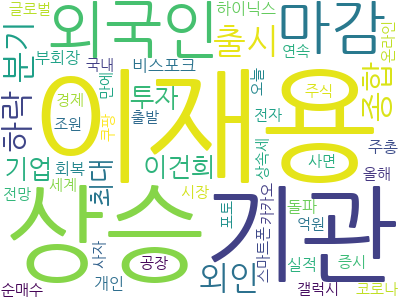

In [326]:
#상승
cloud.to_image()

##### TfidfVectorizer

In [327]:
cv = TfidfVectorizer(max_features = 1000,stop_words=['삼성전자','삼성','반도체','코스피'])

In [328]:
tdm1 = cv.fit_transform(df['제목'])

In [329]:
tdm1.sum()

18418.709206953125

In [330]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm1.sum(axis=0).flat # 표를 평평하게 만듬
})

In [331]:
word_count.sort_values('빈도',ascending=False)

,단어,빈도
657,이재용,198.723137
415,상승,152.656281
613,외국인,145.394072
130,기관,145.000325
257,마감,138.433037
...,...,...
4,kg,5.686860
383,사재,5.452187
724,전혀,5.345743
669,인재로,5.038075


In [332]:
wc = WordCloud(background_color='white',max_words=1000, width=400, height=300)

In [333]:
count_dic = dict(zip(word_count['단어'], word_count['빈도']))

In [334]:
wc = WordCloud(font_path='C:/Windows/Fonts/NanumGothic.ttf',
               background_color='white',
               max_words=50,
               width=400, height=300)

In [335]:
cloud = wc.fit_words(count_dic)

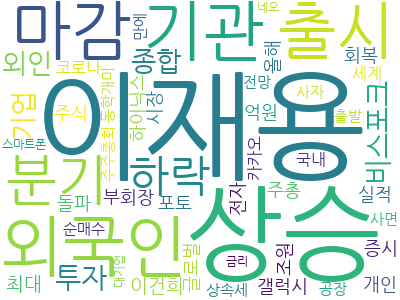

In [336]:
#상승
cloud.to_image()

##### kiwi

In [337]:
kiwi = Kiwi()

In [338]:
kiwi.prepare()

0

In [339]:
cv = TfidfVectorizer(max_features = 1000,stop_words=['삼성전자','삼성','반도체','코스피'],tokenizer=extract_noun_kiwi)

In [340]:
tdm2 = cv.fit_transform(df['제목'])

C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['코스'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [341]:
tdm2.sum()

21762.02194577269

In [342]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm2.sum(axis=0).flat # 표를 평평하게 만듬
})

In [343]:
word_count.sort_values('빈도',ascending=False)

,단어,빈도
862,코스,372.017494
132,기업,180.546932
644,이재용,176.243445
408,상승,171.332502
887,투자,169.899602
...,...,...
93,광클,6.029504
987,회계,5.959247
961,현지,5.645117
163,냉동,5.566150


In [344]:
wc = WordCloud(background_color='white',max_words=1000, width=400, height=300)

In [345]:
count_dic = dict(zip(word_count['단어'], word_count['빈도']))

In [346]:
wc = WordCloud(font_path='C:/Windows/Fonts/NanumGothic.ttf',
               background_color='white',
               max_words=50,
               width=400, height=300)

In [347]:
cloud = wc.fit_words(count_dic)

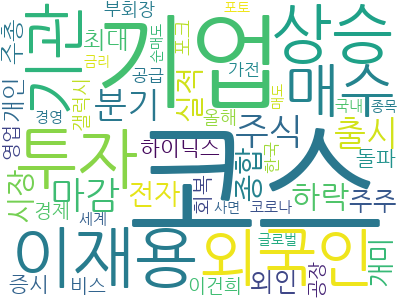

In [348]:
#상승
cloud.to_image()

##### stanza

In [349]:
cv = TfidfVectorizer(max_features = 1000,stop_words=['삼성전자','삼성','반도체','코스피'],tokenizer=extract_noun_stanza)

In [351]:
tdm3 = cv.fit_transform(df['제목'])

In [352]:
tdm3.sum()

20328.86872006375

In [353]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm3.sum(axis=0).flat # 표를 평평하게 만듬
})

In [354]:
word_count.sort_values('빈도',ascending=False)

,단어,빈도
649,이재용,185.917710
133,기업,176.859576
247,마감,164.029774
414,상승,163.941886
600,외국인,158.719156
...,...,...
861,코트라,5.977592
339,보호청,5.926586
138,기초,5.858054
95,구내,5.714662


In [355]:
wc = WordCloud(background_color='white',max_words=1000, width=400, height=300)

In [356]:
count_dic = dict(zip(word_count['단어'], word_count['빈도']))

In [357]:
wc = WordCloud(font_path='C:/Windows/Fonts/NanumGothic.ttf',
               background_color='white',
               max_words=50,
               width=400, height=300)

In [358]:
cloud = wc.fit_words(count_dic)

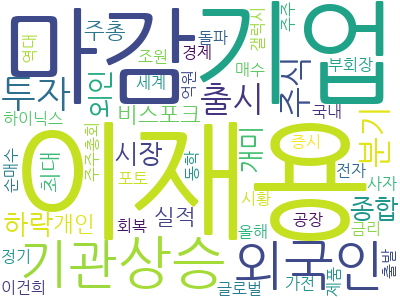

In [359]:
#상승
cloud.to_image()

##### 단어문서 행렬

In [360]:
words = cv.get_feature_names()

In [363]:
joblib.dump({'words': words, 'tdm': tdm,'tdm1': tdm1,'tdm2':tdm,'tdm3':tdm3}, 'nsmc_전체.pkl')

['nsmc_전체.pkl']

### original label

#### 상승

In [364]:
df_1 = df.query('label == 1')

In [365]:
cv = TfidfVectorizer(max_features = 1000,stop_words=['삼성전자','삼성','반도체','코스피'],tokenizer=extract_noun_stanza)

In [366]:
tdm = cv.fit_transform(df_1['제목'])

In [367]:
tdm.sum()

9637.203025274841

In [368]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat # 표를 평평하게 만듬
})

In [369]:
wc = WordCloud(background_color='white',max_words=1000, width=400, height=300)

In [370]:
count_dic = dict(zip(word_count['단어'], word_count['빈도']))

In [371]:
wc = WordCloud(font_path='C:/Windows/Fonts/NanumGothic.ttf',
               background_color='white',
               max_words=50,
               width=400, height=300)

In [372]:
cloud = wc.fit_words(count_dic)

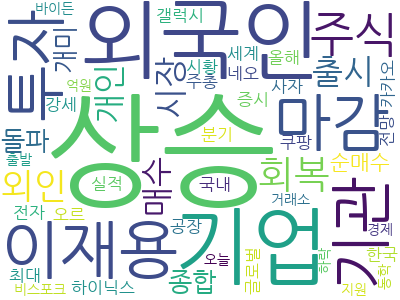

In [373]:
#상승
cloud.to_image()

#### 하락

In [374]:
df_0 = df.query('label == 0')

In [375]:
cv = TfidfVectorizer(max_features = 1000,stop_words=['삼성전자','삼성','반도체','코스피'],tokenizer=extract_noun_stanza)

In [376]:
tdm = cv.fit_transform(df_0['제목'])

In [377]:
tdm.sum()

11082.920906344

In [378]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat # 표를 평평하게 만듬
})

In [379]:
wc = WordCloud(background_color='white',max_words=1000, width=400, height=300)

In [380]:
count_dic = dict(zip(word_count['단어'], word_count['빈도']))

In [381]:
wc = WordCloud(font_path='C:/Windows/Fonts/NanumGothic.ttf',
               background_color='white',
               max_words=50,
               width=400, height=300)

In [382]:
cloud = wc.fit_words(count_dic)

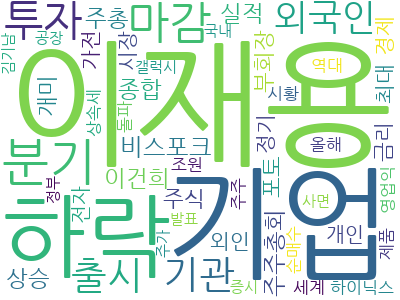

In [383]:
#상승
cloud.to_image()

### new label

#### 상승

In [384]:
df_1 = df.query('new_label == 1')

In [385]:
cv = TfidfVectorizer(max_features = 1000,stop_words=['삼성전자','삼성','반도체','코스피'],tokenizer=extract_noun_stanza)

In [386]:
tdm = cv.fit_transform(df_1['제목'])

In [387]:
tdm.sum()

8280.64913951617

In [388]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat # 표를 평평하게 만듬
})

In [389]:
wc = WordCloud(background_color='white',max_words=1000, width=400, height=300)

In [390]:
count_dic = dict(zip(word_count['단어'], word_count['빈도']))

In [391]:
wc = WordCloud(font_path='C:/Windows/Fonts/NanumGothic.ttf',
               background_color='white',
               max_words=50,
               width=400, height=300)

In [392]:
cloud = wc.fit_words(count_dic)

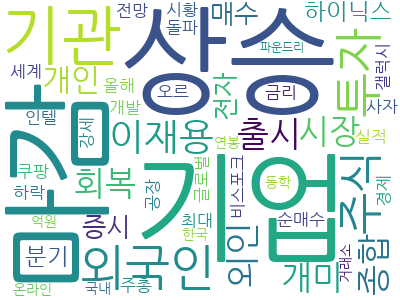

In [393]:
#상승
cloud.to_image()

#### 하락

In [404]:
df_0 = df.query('new_label == 0')

In [405]:
cv = TfidfVectorizer(max_features = 1000,stop_words=['삼성전자','삼성','반도체','코스피'],tokenizer=extract_noun_stanza)

In [406]:
tdm = cv.fit_transform(df_0['제목'])

In [407]:
tdm.sum()

12466.051035078963

In [408]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat # 표를 평평하게 만듬
})

In [409]:
wc = WordCloud(background_color='white',max_words=1000, width=400, height=300)

In [410]:
count_dic = dict(zip(word_count['단어'], word_count['빈도']))

In [411]:
wc = WordCloud(font_path='C:/Windows/Fonts/NanumGothic.ttf',
               background_color='white',
               max_words=50,
               width=400, height=300)

In [412]:
cloud = wc.fit_words(count_dic)

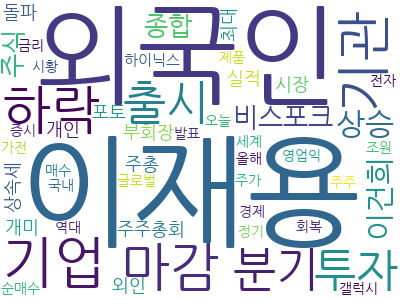

In [413]:
#상승
cloud.to_image()

먼저 label에 구분 없이 단어 구름을 봤을 때 이재용, 기관,상승,마감,외국인 등이 눈에 띄게 보인다. 그러나 저 단어구름만 보고는 어떤 단어가 어디서 많이 나왔는지는 알아보기가 어렵다. 그래서 label과 new_label로 나누어 상승일 때와 하락일 때 어떤 단어가 많이 등장했는지 알아보자.

Original

상승: 상승, 마감, 기업, 이재용, 기관, 투자, 주식 등
- 위의 단어가 많이 나오는 이유는 외국인과 기관 투자자들의 투자가 상승함을 알 수 있다.
- 또한 강세, 돌파, 출발, 글로벌, 출시와 같은 긍정적인 단어들이 포함되어 있다.

하락: 이재용, 하락, 기업, 분기, 주주총회, 이건희, 상속세 등
- 이건희 회장이 별세함에 따라 주주총회가 열리고 상속세와 같은 문제로 주식이 하락함을 알 수 있다.
- 이재용 부회장이 재판을 받아 부정적인 영향을 끼치는 것을 알 수 있다.

New_label

상승: 상승, 마감, 기업, 이재용, 기관, 투자, 주식 등
- 위와 비슷하다.

하락: 이재용, 하락, 기업, 분기, 주주총회, 이건희, 외국인 등
- 외국인이라는 단어가 위와 다르게 눈에 띄는 것을 볼 수 있다.

## 5.Sentiment Analysis

#### Data Load

In [415]:
data = joblib.load('nsmc_전체.pkl')
locals().update(data) #지역변수에 사전을 합쳐준다

In [416]:
words

['가격',
 '가구',
 '가능',
 '가동',
 '가상',
 '가속',
 '가전',
 '가지',
 '가치',
 '간다',
 '갈등',
 '감사',
 '감상',
 '감소',
 '감염병',
 '강보합',
 '강세',
 '강화',
 '개막',
 '개미',
 '개발',
 '개방',
 '개사',
 '개선',
 '개월',
 '개월만',
 '개인',
 '개장',
 '개최',
 '개통',
 '개편',
 '갤노트',
 '갤럭',
 '갤럭시',
 '거래',
 '거래소',
 '거래일',
 '거리두',
 '건설',
 '건의',
 '걸리',
 '검사',
 '검토',
 '게이밍',
 '게임',
 '격리',
 '격차',
 '결정',
 '결제',
 '경기',
 '경신',
 '경영',
 '경영권',
 '경영위원회',
 '경영진',
 '경쟁',
 '경쟁력',
 '경제',
 '경총',
 '계속',
 '계약',
 '계열사',
 '계좌',
 '계획',
 '고객',
 '고객사',
 '고동진',
 '고문',
 '고민',
 '고용',
 '공간',
 '공개',
 '공격',
 '공급',
 '공급난',
 '공급망',
 '공기청',
 '공략',
 '공매',
 '공모',
 '공시',
 '공식',
 '공장',
 '공정',
 '공정위',
 '공채',
 '공포',
 '공헌',
 '과제',
 '관련',
 '관리',
 '관망세',
 '관심',
 '광고',
 '구글',
 '구내',
 '구조',
 '구축',
 '구치소',
 '국가',
 '국가재난안전통신',
 '국내',
 '국민',
 '국민가전',
 '국민연금',
 '국제',
 '국채',
 '굳히',
 '굴기',
 '권고',
 '권오현',
 '권칠승',
 '규모',
 '규제',
 '그랑데',
 '그룹',
 '글로벌',
 '금리',
 '금융',
 '급등',
 '급락',
 '급식',
 '급증',
 '긍정',
 '기관',
 '기능',
 '기대',
 '기대감',
 '기록',
 '기반',
 '기부',
 '기술',
 '기아',
 '기업',
 '기업가치',
 '기업공시',
 '기준'

In [417]:
nsmc = pd.read_csv('삼성전자_전처리.xlsx')

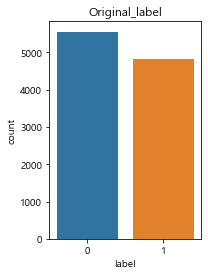

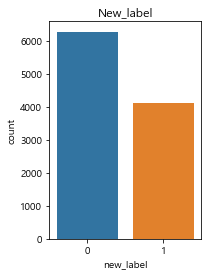

In [614]:
pyplot.subplot(121)
sns.countplot(x="label", data=nsmc)
plt.title("Original_label")
plt.show()

pyplot.subplot(122)
sns.countplot(x="new_label", data=nsmc)
plt.title("New_label")
plt.show()

In [613]:
print(round(len(nsmc.query('label==1'))/len(nsmc.label),2)*100)
print(round(len(nsmc.query('label==0'))/len(nsmc.label),2)*100)
print(round(len(nsmc.query('new_label==1'))/len(nsmc.label),2)*100)
print(round(len(nsmc.query('new_label==0'))/len(nsmc.label),2)*100)


47.0
53.0
40.0
60.0


# new_label

### 로지스틱 회귀분석

In [460]:
x = tdm3 # stanza 사용

In [461]:
y = nsmc.new_label

In [462]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5419)

#### early stoping

In [463]:
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

In [464]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)

In [465]:
model = tf.keras.models.Sequential()

In [466]:
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [467]:
model.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy'])

In [468]:
model.fit(x_train.A, y_train, epochs=100, validation_split=0.1,
          callbacks=[es,mc])

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

234/234 [==============================] - 0s 906us/step - loss: 0.6805 - accuracy: 0.5934 - val_loss: 0.6740 - val_accuracy: 0.5925
Epoch 2/100
234/234 [==============================] - 0s 661us/step - loss: 0.6611 - accuracy: 0.6072 - val_loss: 0.6639 - val_accuracy: 0.5925
Epoch 3/100
234/234 [==============================] - 0s 639us/step - loss: 0.6490 - accuracy: 0.6074 - val_loss: 0.6572 - val_accuracy: 0.5925
Epoch 4/100
234/234 [==============================] - 0s 759us/step - lo

In [469]:
model.evaluate(x_test.A, y_test)

65/65 [==============================] - 0s 460us/step - loss: 0.5641 - accuracy: 0.6854


[0.5640968084335327, 0.6854256987571716]

In [470]:
w, b = model.weights

In [471]:
word_sent = pd.DataFrame({'토큰': words, '가중치': w.numpy().flat})

In [473]:
word_sent.sort_values('가중치').tail(20)

,토큰,가중치
470,손경식,2.234530
220,도입,2.276275
669,일감,2.295363
794,진입,2.336583
889,투표,2.444028
289,무선청소기,2.516739
43,게이밍,2.572456
905,평균,2.612691
326,법정,2.780346
915,표준화,3.015800


<AxesSubplot:xlabel='토큰', ylabel='가중치'>

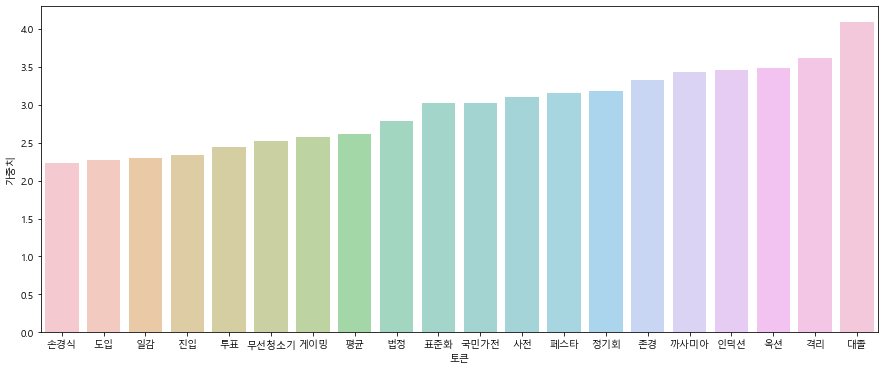

In [478]:
a = word_sent.sort_values('가중치').reset_index().drop('index',axis=1).iloc[-20:,:]
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='토큰',y='가중치', data=a, alpha=0.5)  

In [482]:
word_sent.sort_values('가중치').head(20)

,토큰,가중치
143,김기남,-5.354616
632,이건희,-4.185835
243,로너청소기,-3.891852
977,화질,-3.801333
612,월드,-3.736470
407,삼성카드,-3.650817
263,맞춤,-3.528704
917,풀무원,-3.454265
296,미술품,-3.441410
353,부채,-3.419687


<AxesSubplot:xlabel='토큰', ylabel='가중치'>

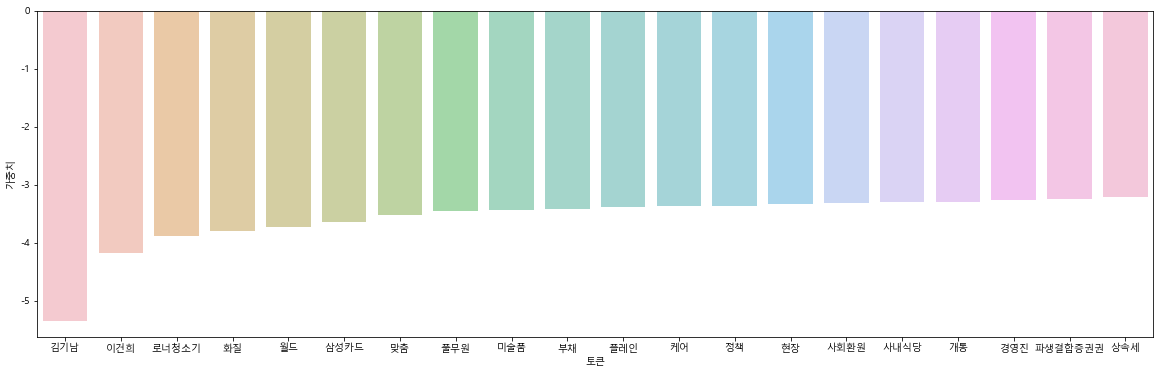

In [479]:
a = word_sent.sort_values('가중치').reset_index().drop('index',axis=1).iloc[:20,:]
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x='토큰',y='가중치', data=a, alpha=0.5)  

### 분석

긍부정 단어 인터넷 기사를 통해 어떤 내용인지 파악

#### 상승

- 대졸: 삼성전자 대졸자 등 연봉 11% 파격 인상
- 격리: 삼성전자 인도법인 항공비,자가격리 비용 지원
- 옥션: 옥션에서 생활가전 69%로 할인
- 인덕션: 삼성전자 비스포크 홈 및 비스포크 제품 인덕션 출시
- 까사미아: 까사미아 삼성전자 협업 매장 오픈
- 국민가전 & 페스타 : 삼성전자 국민가전 페스타 진행
- 무선청소기: 삼성전자 제트봇AI 매출 3배 성장
- 투표: 삼성전자 전자투표 시행
- 손경식: 이재용 사면 요구

하락
- 김기남: 삼성전자 부회장 김기남 이건희 회장 재산 상속 계획 발표
- 이건희: 삼성전자 회장 별세
- 미술품 & 사회환원 & 경영진 & 상속세: 이건희 회장 별세
- 경영진: 이재용 부회장 재판 & 수술

## 6.Topic Analysis

### LSA

In [484]:
df = pd.read_csv('삼성전자_전처리.xlsx')

C:\Users\pc\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [485]:
cv = TfidfVectorizer(max_features = 1000,stop_words=['삼성전자','삼성','반도체','코스피'],tokenizer=extract_noun_stanza)

C:\Users\pc\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [486]:
tdm3 = cv.fit_transform(df['제목'])

C:\Users\pc\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [487]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm3.sum(axis=0).flat # 표를 평평하게 만듬
})

C:\Users\pc\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [488]:
svd = TruncatedSVD(n_components=100, random_state=5419)

C:\Users\pc\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [489]:
svd.fit(tdm3)

C:\Users\pc\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TruncatedSVD(n_components=100, random_state=5419)

In [490]:
svd.components_.shape

C:\Users\pc\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(100, 1000)

In [503]:
def resample(a):
    return np.random.choice(a, size=nrow)

C:\Users\pc\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [679]:
def LSA(text):
    word_idx = words.index(text)
    svd.components_[:, word_idx]
    
    max_index = svd.components_[:, word_idx].argmax()
    print("가장 강한 양의 주제의 Index", max_index)
    min_index = svd.components_[:, word_idx].argmin()
    print("가장 강한 음의 주제의 Index", min_index)

    topic_max = pd.DataFrame({'word': words, 'loading': svd.components_[max_index]})
    print('양의 관계')
    display(topic_max.sort_values('loading').tail(20))
    topic_min = pd.DataFrame({'word': words, 'loading': svd.components_[min_index]})
    print('음의 관계')
    display(topic_min.sort_values('loading').head(20))
    
    nrow, ncol = tdm3.shape
    def resample(a):
        return np.random.choice(a, size=nrow)
    np.random.seed(2999)
    d = np.apply_along_axis(resample, 0, tdm3.A)
    svd2 = TruncatedSVD(n_components=100, random_state=5419)
    svd2.fit(d)
            
    pyplot.figure(figsize= (16,8))
    pyplot.subplot(131)
    pyplot.plot(svd.singular_values_)
    pyplot.plot(svd2.singular_values_)
    pyplot.subplot(132)
    pyplot.plot(svd.singular_values_[50:])
    pyplot.plot(svd2.singular_values_[50:])
    pyplot.show()
    
    new_index = np.argwhere(svd.singular_values_ - svd2.singular_values_ <= 0)[0][0]
    print("병렬분석 Index", new_index)

    max_index = svd.components_[:, word_idx][:new_index].argmax()
    print("병렬 분석 가장 강한 양의 주제의 Index", max_index)
    min_index = svd.components_[:, word_idx][:new_index].argmin()
    print("병렬 분석 가장 강한 음의 주제의 Index", min_index)

    topic_max = pd.DataFrame({'word': words, 'loading': svd.components_[max_index]})
    print('양의 관계')
    display(topic_max.sort_values('loading').tail(20))
    topic_min = pd.DataFrame({'word': words, 'loading': svd.components_[min_index]})
    print('음의 관계')
    display(topic_min.sort_values('loading').head(20))
    
    pyplot.figure(figsize= (16,8))
    
    pyplot.subplot(131)
    pyplot.plot(svd.components_[:, word_idx])
    pyplot.title("LSA")
    pyplot.subplot(132)
    pyplot.plot(svd.components_[:, word_idx][:new_index])
    pyplot.title("LSA_2")
    pyplot.show()

가장 강한 양의 주제의 Index 39
가장 강한 음의 주제의 Index 58
양의 관계


,word,loading
979,확대,0.062065
51,경영,0.063476
556,업종,0.067667
101,국내,0.069336
555,업계,0.074889
117,금리,0.081218
795,진출,0.082259
894,파운드리,0.101878
524,실적,0.102100
748,종합,0.110673


음의 관계


,word,loading
749,주가,-0.248533
936,한국,-0.247875
586,오르,-0.220846
647,이유,-0.128219
725,정부,-0.115072
897,판매,-0.113094
761,주총,-0.113016
738,제품,-0.110079
495,스마트폰,-0.109366
454,세계,-0.106588


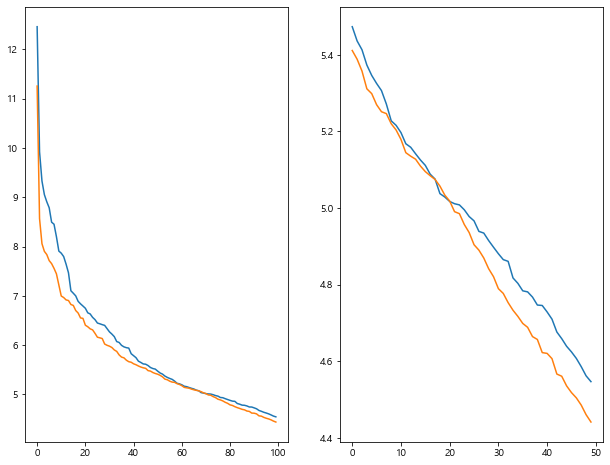

병렬분석 Index 68
병렬 분석 가장 강한 양의 주제의 Index 39
병렬 분석 가장 강한 음의 주제의 Index 58
양의 관계


,word,loading
979,확대,0.062065
51,경영,0.063476
556,업종,0.067667
101,국내,0.069336
555,업계,0.074889
117,금리,0.081218
795,진출,0.082259
894,파운드리,0.101878
524,실적,0.102100
748,종합,0.110673


음의 관계


,word,loading
749,주가,-0.248533
936,한국,-0.247875
586,오르,-0.220846
647,이유,-0.128219
725,정부,-0.115072
897,판매,-0.113094
761,주총,-0.113016
738,제품,-0.110079
495,스마트폰,-0.109366
454,세계,-0.106588


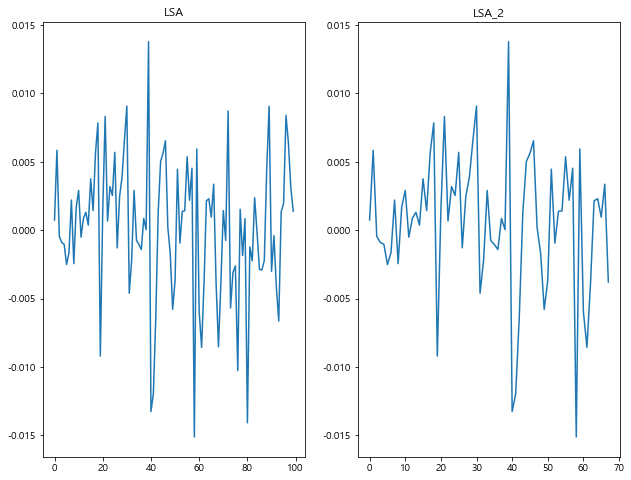

In [727]:
LSA('정책')

In [728]:
def LSA_Rotator(text):
    rotator = Rotator()
    rot = rotator.fit_transform(svd.components_.T)
    loading = rot.T
    word_idx = words.index(text)
    
    
    max_index = loading[:, word_idx].argmax()
    print("가장 강한 양의 주제의 Index", max_index)
    min_index = loading[:, word_idx].argmin()
    print("가장 강한 음의 주제의 Index", min_index)

    topic_max = pd.DataFrame({'word': words, 'loading': loading[max_index]})
    print('양의 관계')
    display(topic_max.sort_values('loading').tail(20))
    topic_min = pd.DataFrame({'word': words, 'loading': loading[min_index]})
    print('음의 관계')
    display(topic_min.sort_values('loading').head(20))
    
    pyplot.figure(figsize= (16,8))
    pyplot.plot(loading[:, word_idx])
    
    

가장 강한 양의 주제의 Index 61
가장 강한 음의 주제의 Index 93
양의 관계


,word,loading
979,확대,0.050308
113,규제,0.054703
948,해결,0.059509
210,대책,0.060434
395,사태,0.065435
315,발표,0.066777
481,수익,0.069092
426,생산,0.072873
200,대란,0.079663
351,부족,0.094074


음의 관계


,word,loading
754,주목,-0.541604
0,가격,-0.310885
126,기대,-0.159941
321,배터리,-0.146709
119,급등,-0.127110
303,바이든,-0.123899
796,진행,-0.121128
356,분기,-0.115815
292,미국,-0.107518
112,규모,-0.100966


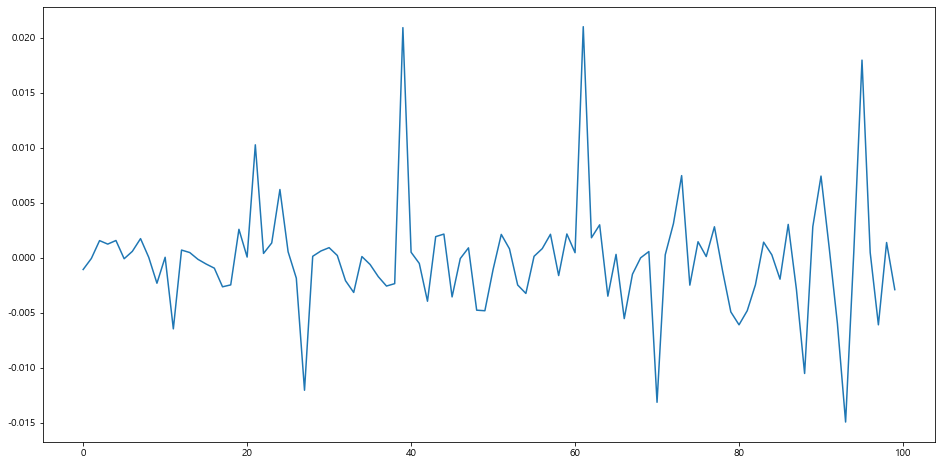

In [729]:
LSA_Rotator('정책')

### NMF

In [730]:
def NMF(text):
    word_idx = words.index(text)
    svd.components_[:, word_idx]
    
    nrow, ncol = tdm3.shape
    def resample(a):
        return np.random.choice(a, size=nrow)
    np.random.seed(2999)
    d = np.apply_along_axis(resample, 0, tdm3.A)
    svd2 = TruncatedSVD(n_components=100, random_state=1234)
    svd2.fit(d)
    new = np.argwhere(svd.singular_values_ - svd2.singular_values_ <= 0)[0][0]
    
    from sklearn.decomposition import NMF
    nmf = NMF(n_components=new, random_state=5419)
    doc_topics = nmf.fit_transform(tdm3)
    loading = nmf.components_
    word_idx = words.index('대졸')
    
    max_index = loading[:, word_idx].argmax()
    print("가장 강한 양의 주제의 Index", max_index)
    min_index = loading[:, word_idx].argmin()
    print("가장 강한 음의 주제의 Index", min_index)

    topic_max = pd.DataFrame({'word': words, 'loading': loading[max_index]})
    print('양의 관계')
    display(topic_max.sort_values('loading').tail(20))
    topic_min = pd.DataFrame({'word': words, 'loading': loading[min_index]})
    print('음의 관계')
    display(topic_min.sort_values('loading').head(20))

    pyplot.plot(loading[:, word_idx])
    pyplot.show()

가장 강한 양의 주제의 Index 42
가장 강한 음의 주제의 Index 0
양의 관계


,word,loading
67,고문,0.330827
288,무보수,0.336800
405,삼성전기,0.350845
233,등기,0.356482
642,이상,0.383399
678,임직원,0.409552
483,수준,0.415197
597,올리,0.465537
208,대졸,0.480302
586,오르,0.531524


음의 관계


,word,loading
499,시가총액,0.0
585,오늘,0.0
941,한솔케미칼,0.0
940,한샘,0.0
588,오스틴,0.0
939,한국판,0.0
938,한국투자증권,0.0
591,오프라인,0.0
592,오픈,0.0
593,오후,0.0


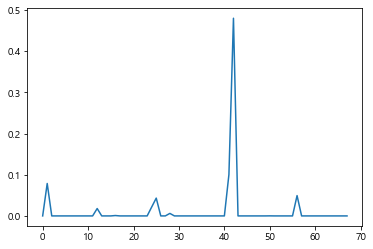

In [732]:
NMF('정책')

### LDA

In [594]:
corpus = Sparse2Corpus(tdm3.T)

In [630]:
id2token = dict(enumerate(words))

In [619]:
df_title = df.loc[:,'제목']

In [620]:
token_re = re.compile(cv.token_pattern) 

In [642]:
docs = []
for i in df_title:
    doc = []
    for tok in token_re.findall(i):
        doc.append(tok.lower())
    docs.append(doc)

In [643]:
dic = Dictionary(docs)

In [734]:
dic.filter_extremes(no_below=10, no_above=0.9) 

In [735]:
bows = []
for doc in docs:
    bow = dic.doc2bow(doc)
    bows.append(bow)

In [749]:
model = LdaModel(corpus=corpus,id2word=id2token,num_topics=25,passes=5,iterations=100,random_state=5419)

In [750]:
for i in range(25):
    print(model.show_topic(i))
    print('\n')

[('출시', 0.10824614), ('비스포크', 0.10183947), ('공개', 0.07323331), ('나오', 0.067746766), ('선정', 0.05316956), ('제품', 0.050564572), ('글로벌', 0.047889296), ('기업', 0.036135364), ('혁신', 0.027892053), ('안착', 0.026819302)]


[('투자', 0.061846226), ('가격', 0.05428573), ('예상', 0.051195018), ('마련', 0.051111538), ('재판', 0.049857233), ('확산', 0.047576945), ('금융', 0.03838883), ('관망세', 0.037827276), ('이재용', 0.030791441), ('천억원', 0.0301263)]


[('주가', 0.08766653), ('전쟁', 0.06054587), ('앞두', 0.057310633), ('직원', 0.04136848), ('기회', 0.037174664), ('거래', 0.03425117), ('보유', 0.033807527), ('깜짝', 0.03251855), ('실적', 0.02974075), ('시즌', 0.028739434)]


[('현대차', 0.07066058), ('변경', 0.060384177), ('공장', 0.059159067), ('계열사', 0.04897049), ('수익', 0.041089866), ('상장', 0.035386715), ('전환', 0.033788264), ('펀드', 0.032316007), ('급증', 0.03215499), ('밀리', 0.030779937)]


[('주주총회', 0.06672982), ('오전', 0.06217257), ('주주', 0.050044354), ('손경식', 0.04561666), ('정기', 0.042052004), ('핵심', 0.04163079), ('시장', 0.035601474), ('단계', 0.0

### 긍정 주제분석

긍정 주제분석 키워드: 대졸, 상승, 까사미아, 목표

- 대졸: 상승,공채,계약,성장,연봉,임금,인상,채용,전망,신입,흑자
- 상승: 출발,회복,외국인, 기관,금리,마감, 대형주,매수세,전환
- 까사미아: 수익,목표,주가,억원,최고,성장,역대,주목,매출,오픈,흑자,이상
- 목표: 지난해,수익,배터리,매출,주가,성장,속도,확대,배당,성장

[해석]: 주가상승에 대한 긍정적 단어와 연관성 (감정분석 & 단어구름)

1.상반기 파격적인 임금 상승으로 인한 공채 지원 상승 등 사회적 이슈 증가  
2.외국인, 기관 투자자들의 투자 증가로 주식 회복으로 전환 & 1분기 마감  
3.까시미아와 협동으로 오픈 목표 수익 역대 최고 성장 최고 매출  주목 받음  
4.지난해 수익 대비 삼성전자 매출 증가 빠른 속도로 성장세   

### 부정 주제분석

부정 주제분석 키워드: 이건희,이재용,상속세,정책

- 이건희: 지분,납부,사회한원,미술품,역대,기증,상속,유산,발표,상속세
- 이재용: 사면,회계,수사,출석,구치소,투약,불법,프로포폴,수술,재판
- 상속세: 지분,납부,사회환원,역대,미술품,상속,유산,기증
- 정책: 규제,대책,사태,생산,대란,부족,지원,공급
    
[해석]:주가하락에 대한 부정적 단어와 연관성 (감정분석 & 단어구름)

1.이건희 회장이 죽으며 재산을 사회에 환원, 유산,상속세 등 문제 발생  
2.이재용 회장의 여러 죄로 수사와 재판 중, 건강 악화 수술 예정  
3.이건희 회장이 남긴 많은 재산의 상속세와 재산의 사회환원  
4.코로나19로 인한 반도체 생산 재료 공급 물량부족, 정책 규제  





### LDA해석

[긍정적 해석]
삼성전자 영업이익 최고치  
외인,개인 주식 매수 주가 회복  
인텔 부사장 방, 배터리 가전 투자  
비스포크 가전 제품 출시  

[부정적 해석]
이건희 회장 역대 최대 기부  
삼성전자 주주총회  

## Conclusion

### 주가 상승과 하락 예측 & 투자 타이밍  
[주가 상승: 긍정적인 영향]  

신제품 출시와 그에 따른 매출이 증가  
기관, 외국인, 외인 투자자들이 급증  
연금 인상, 비용 지원 등 긍정적인 사회적 이슈  
다른 기업과 협업과 그에 따른 매출  
기업의 이벤트로 인한 매출 상승  

[주가 하락: 부정적인 영향]  
  
그룹 회장의 별세  
상속세와 지분 배분으로 인한 혼란스러움  
경영진 변경으로 인한 주주총회  
대표 경영진의 법적 공방과 건강악화  


### 아쉬운점  
해당 기업의 부정적인 영향이 회장의 별세로 한정적이었다.  
주식 거래 자체가 종목이 제한적이라 다른 종목에 대한 일반화는 불가능하다고 판단된다.  
여러 기업과 종목을 분석해 보지 못했다.  


### 결론:  
주가 상승과 하락에 미치는 영향을 뉴스기사를 통한 텍스트 데이터 분석으로 알아보았다. 주식 거래 시 해당 기업의 정보를 뉴스 기사를 통해 알고, 긍정적인지 부정적인지 알아야 할 필요가 있다. 텍스트 데이터를 통해 분석한 내용은 실제로 주가 형성에 많은 영향을 끼친다. 뉴스 기사가 주가 형성에 많은 영향을 끼치는 만큼 해당 기업의 정보에 귀를 기울여야 할 필요가 있다.
